# *Predicting Life Expectancy*



## Project Overview

This project explores methods to predict life expectancy using machine learning models. It aims to identify the best-performing approach by improving the \( R^2 \) score through feature engineering and model optimization. 

## Problem statement: 

To predict the life expectancy of people in a country based on various immunization factors and the country in which they are based so that necessary action can be taken to increase the life expectancy.




## Dataset Information

The dataset used in this project is titled **"Life Expectancy (WHO)"** and is publicly available on Kaggle at the following link: [Life Expectancy Dataset on Kaggle](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data).

It has been compiled from the **Global Health Observatory (GHO)** data repository under the **World Health Organization (WHO)** and supplemented with corresponding economic data from the **United Nations**. It tracks life expectancy and related health factors for 193 countries between 2000 and 2015.

## Key Steps:
1. **Data Exploration** 
   - Understand the dataset structure and variable distributions.
   
2. **Exploratory Data Analysis (EDA)** 
   - Handle missing values using mean/mode imputation.
   - Perform one-hot and label encoding for categorical variables.

3. **Feature Engineering**
   - Feature scaling using normalization techniques.
   - Feature extraction: Identify the top features impacting life expectancy.

4. **Model Building**
   - Train and evaluate regression models including:
     - Linear Regression
     - Lasso Regression
     - Advanced feature selection using PCA

5. **Evaluation**
   - Evaluate models using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and \( R^2 \).

## Methodology
1. **Data Preprocessing**
    - Imputation of missing values
    - Label /One Hot encoding.
    - Format text.

2. **Feature Selection**
    - Address multicollinearity using Variance Inflation Factor (VIF).
    - Identify highly correlated features to life expectancy.
    - Handle positive and negative skewness with Yeo-Jonson and Square methods.
    - MinMax Scaling to normalize data.
    - Perform Principal Component Analysis (PCA) to reduce dimensionality.

3. **Model Training**
    - Use 60/40 and 80/20 splitted data to compare performance.
    - Build a simple linear regression model over 60/40 data.
    - Build a multilinear regression model with both 60/40 and 80/20 data.
    - Plot the best fit line for each independent feature 
    - Compare results from multiple regression models to maximize R².

4. **Model Evaluation and Tuning**
    - Display test data predictions for each model.
    - Evaluate models using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² Score.
    - K-fold Cross Validation and Lasso Regression

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn import linear_model
import seaborn as sb
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, QuantileTransformer, FunctionTransformer, PowerTransformer
from scipy.stats.mstats import winsorize
from scipy.stats import skew
from statistics import mean
%matplotlib inline

In [6]:
pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\aleec\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
Note: you may need to restart the kernel to use updated packages.


In [7]:
df = pd.read_csv(r"C:\Users\aleec\ML_toPredict_LifeExpectancy\Data\Life Expectancy Data.csv")

In [8]:
pd.set_option('display.max_columns', None)

## 1. Data exploration

In [10]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [11]:
df.shape

(2938, 22)

In [12]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [13]:
# Remove extra spaces at the beginning and the end of the column name
df.columns = df.columns.str.strip()

In [14]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


#### **Target variable**: Life expectancy

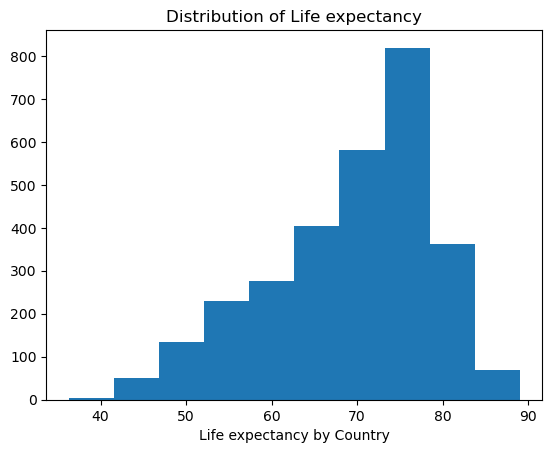

In [16]:
plt.hist(df['Life expectancy'])
plt.title('Distribution of Life expectancy')
plt.xlabel('Life expectancy by Country')
plt.show()

## 2. EDA and Data Preprocessing:

#### There are no duplicated values in the dataset

In [19]:
df[df.duplicated()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling


#### Drop features based on the correlation coeficcient, the closer to 0, the less correlated is a independent variable with the target feature

In [21]:
df.drop({'Measles', 'Population', 'infant deaths'}, axis=1, inplace=True)

In [22]:
corr_df = df.corr(numeric_only=True)
corr_df

,Year,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.052990,0.031400,0.104333,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,0.404877,0.381864,0.256762,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,-0.195848,-0.242860,-0.162476,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,0.302904,0.308457,-0.457626,-0.454612
Alcohol,-0.052990,0.404877,-0.195848,1.000000,0.341285,0.087549,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,0.341285,1.000000,0.016274,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,0.087549,0.016274,1.000000,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.120429,-0.124960,0.199549,0.231117
BMI,0.108974,0.567694,-0.387017,0.330408,0.228700,0.150380,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,-0.112370,-0.087852,-0.233126,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.467789,0.472263,-0.163305,-0.209373
Polio,0.094158,0.465556,-0.274823,0.221734,0.147259,0.486171,0.284569,-0.188720,1.000000,0.137330,0.673553,-0.159560,0.211976,-0.221823,-0.222592,0.381078,0.417866
Total expenditure,0.090740,0.218086,-0.115281,0.296942,0.174420,0.058280,0.242503,-0.130148,0.137330,1.000000,0.152754,-0.001389,0.138364,-0.277101,-0.283774,0.166682,0.246384


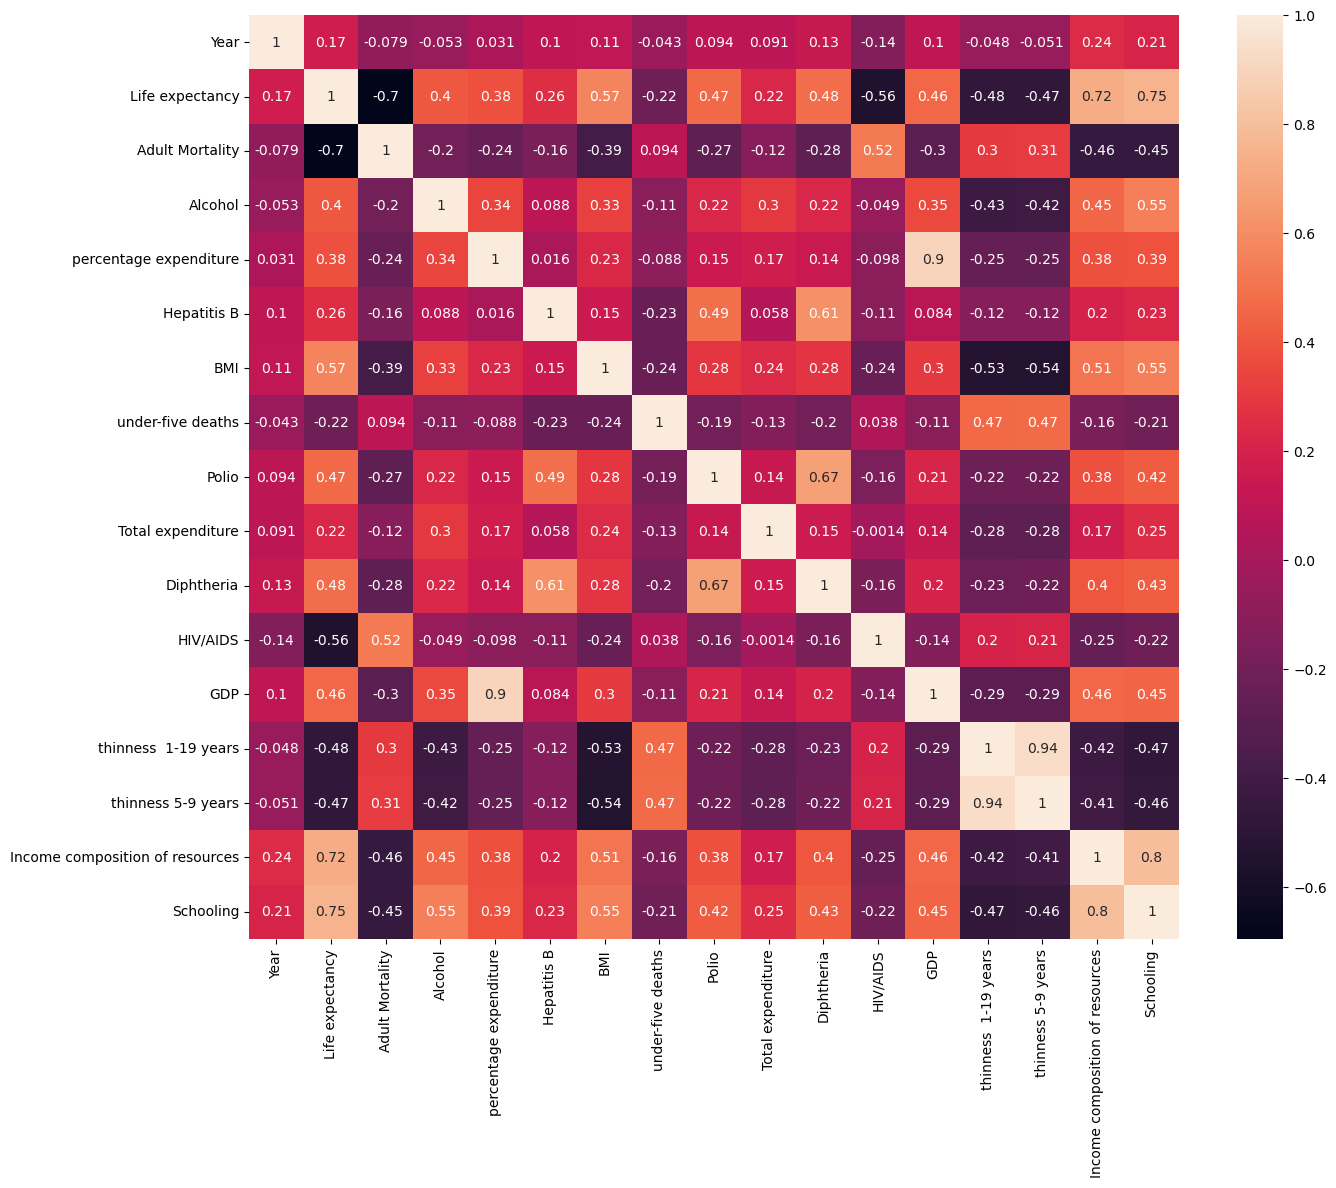

In [23]:
plt.figure(figsize=(15, 12))
sb.heatmap(corr_df, annot=True)
plt.show()

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Life expectancy'}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'Alcohol'}>],
       [<Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'under-five deaths'}>],
       [<Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total expenditure'}>,
        <Axes: title={'center': 'Diphtheria'}>,
        <Axes: title={'center': 'HIV/AIDS'}>],
       [<Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'thinness  1-19 years'}>,
        <Axes: title={'center': 'thinness 5-9 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>],
       [<Axes: title={'center': 'Schooling'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

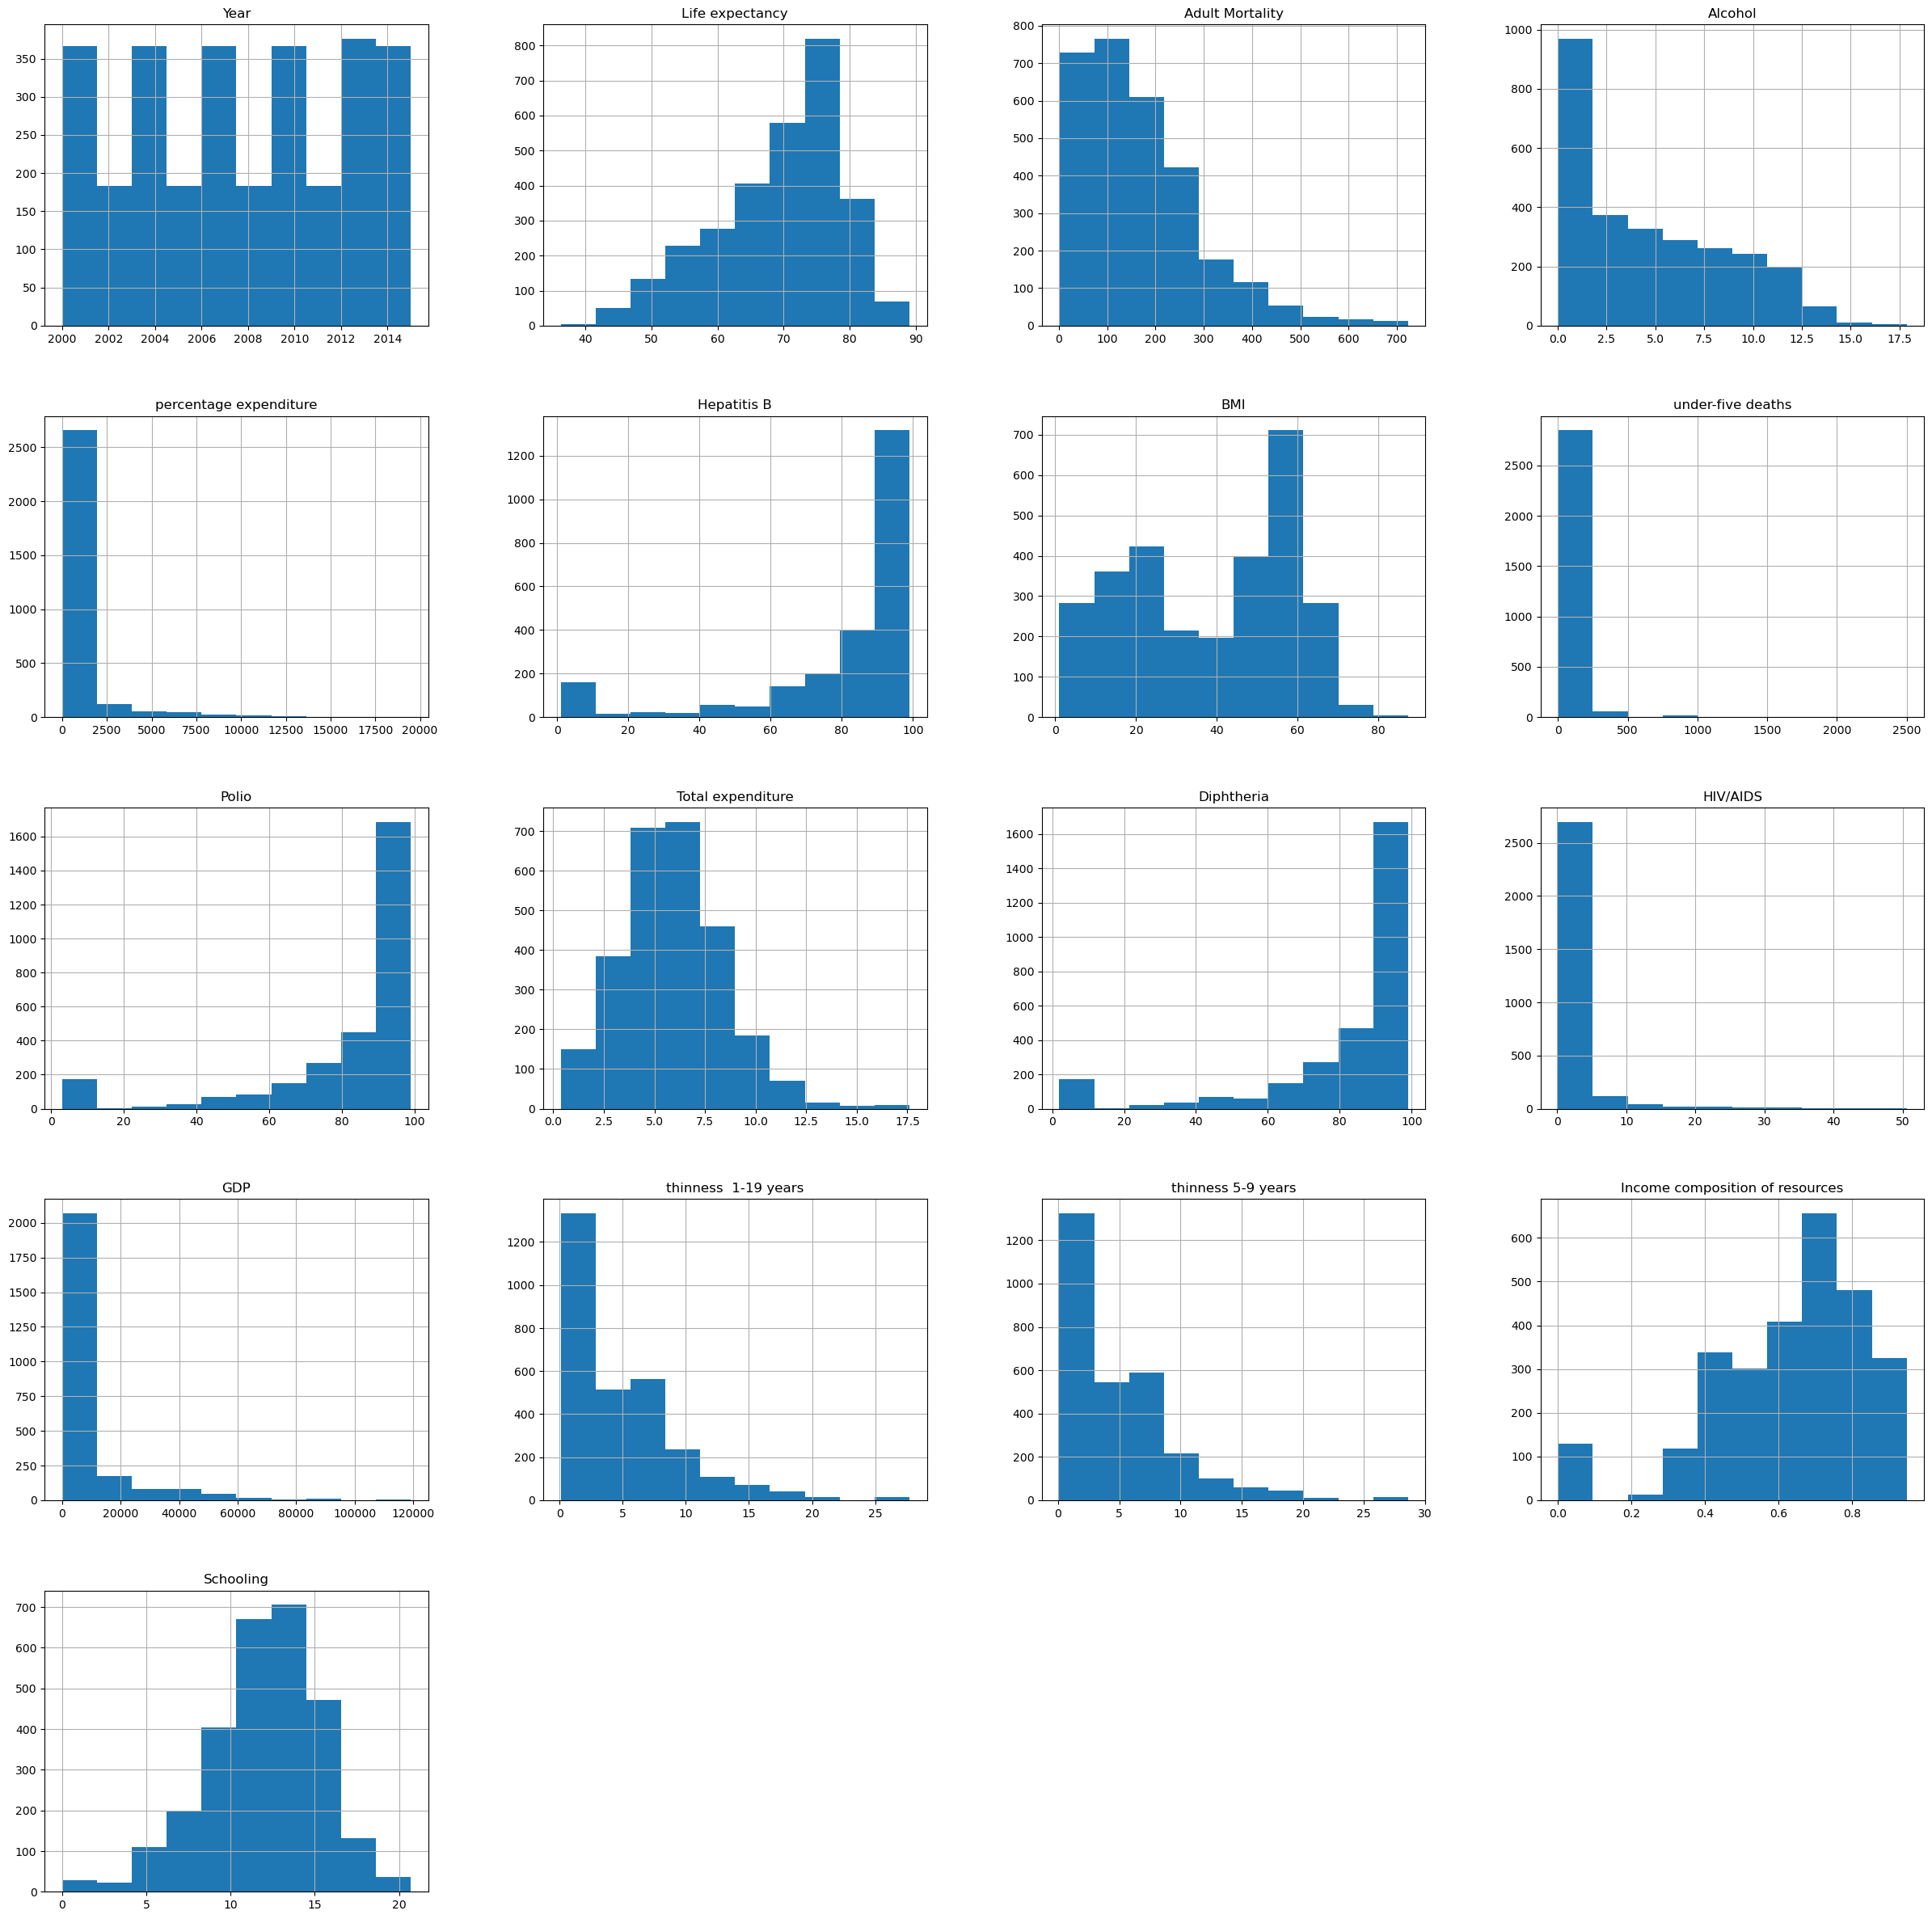

In [24]:
# Histogram distribution for each variable
df.hist(figsize=(30, 30))

In [25]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [26]:
# all nulls in df to check structure
df.loc[df[(df.isnull().any(axis=1))].index]

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,NaN,0.000000,95.0,59.5,24,95.0,NaN,95.0,0.1,4132.762920,6.0,5.8,0.743,14.4
44,Algeria,2003,Developing,71.7,146.0,0.34,25.018523,NaN,47.0,23,87.0,3.60,87.0,0.1,294.335560,6.3,6.1,0.663,11.5
45,Algeria,2002,Developing,71.6,145.0,0.36,148.511984,NaN,46.1,23,86.0,3.73,86.0,0.1,1774.336730,6.3,6.2,0.653,11.1
46,Algeria,2001,Developing,71.4,145.0,0.23,147.986071,NaN,45.3,24,89.0,3.84,89.0,0.1,1732.857979,6.4,6.3,0.644,10.9
47,Algeria,2000,Developing,71.3,145.0,0.25,154.455944,NaN,44.4,25,86.0,3.49,86.0,0.1,1757.177970,6.5,6.4,0.636,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,Zambia,2003,Developing,46.4,64.0,2.33,65.789974,NaN,17.6,62,85.0,8.18,83.0,18.2,429.158343,7.3,7.2,0.443,10.2
2919,Zambia,2002,Developing,45.5,69.0,2.44,54.043480,NaN,17.3,66,85.0,6.93,84.0,18.4,377.135244,7.4,7.3,0.433,10.0
2920,Zambia,2001,Developing,44.6,611.0,2.61,46.830275,NaN,17.1,70,86.0,6.56,85.0,18.6,378.273624,7.4,7.4,0.424,9.8
2921,Zambia,2000,Developing,43.8,614.0,2.62,45.616880,NaN,16.8,72,85.0,7.16,85.0,18.7,341.955625,7.5,7.5,0.418,9.6


In [27]:
# Sort year ascending to fill null with ffill method
df.sort_values(['Country', 'Year'], ascending=True, inplace=True)

In [28]:
df[df['Life expectancy'].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0.01,0.000000,98.0,82.8,0,98.0,3.58,98.0,0.1,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0.01,11.419555,96.0,58.4,0,96.0,5.58,96.0,0.1,722.756650,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0.01,871.878317,8.0,81.6,0,79.0,17.24,79.0,0.1,3617.752354,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0.01,0.000000,99.0,NaN,0,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0.01,15.606596,87.0,87.3,0,87.0,4.65,87.0,0.1,136.183210,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0.01,0.000000,99.0,77.3,0,99.0,7.20,99.0,0.1,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,NaN,344.690631,99.0,83.3,0,99.0,9.27,99.0,0.1,1932.122370,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,8.54,0.000000,97.0,5.2,0,96.0,6.14,96.0,0.1,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0.01,0.000000,69.0,NaN,0,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0.01,78.281203,9.0,79.3,0,9.0,16.61,9.0,0.1,3542.135890,0.2,0.1,NaN,0.0


#### The past list of countries has only occurrences in 2013 and most values are NaN, including values on target variable. For that reason, they will be dropped.

In [30]:
# Df filtered
df.loc[df.Country.isin(['Cook Islands', 'Dominica', 'Marshall Islands', 'Monaco', 'Nauru', 'Niue', 'Palau', 'Saint Kitts and Nevis', 'San Marino', 'Tuvalu'])]
# Getting index of each country to be dropped
df.loc[df['Country'].isin(['Cook Islands', 'Dominica', 'Marshall Islands', 'Monaco', 'Nauru', 'Niue', 'Palau', 'Saint Kitts and Nevis', 'San Marino', 'Tuvalu'])].index.values

array([ 624,  769, 1650, 1715, 1812, 1909, 1958, 2167, 2216, 2713],
      dtype=int64)

In [31]:
df.drop([624, 769, 1650, 1715, 1812, 1909, 1958, 2167, 2216, 2713], inplace=True)

In [32]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                443
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
dtype: int64

In [33]:
# Fill missing values first using the forward and then backward methods.

df['Alcohol'] = df.groupby('Country')['Alcohol'].ffill()
df['Hepatitis B'] = df.groupby('Country')['Hepatitis B'].ffill().bfill()
df['BMI'] = df.groupby('Country')['BMI'].ffill().bfill()
df['Polio'] = df.groupby('Country')['Polio'].ffill().bfill()
df['Diphtheria'] = df.groupby('Country')['Diphtheria'].ffill().bfill()
df['Total expenditure'] = df.groupby('Country')['Total expenditure'].ffill().bfill()
df['GDP'] = df.groupby('Country')['GDP'].ffill().bfill()
df['Income composition of resources'] = df.groupby('Country')['Income composition of resources'].ffill().bfill()
df['Schooling'] = df.groupby('Country')['Schooling'].ffill().bfill()

In [34]:
df.isnull().sum()

Country                             0
Year                                0
Status                              0
Life expectancy                     0
Adult Mortality                     0
Alcohol                            16
percentage expenditure              0
Hepatitis B                         0
BMI                                 0
under-five deaths                   0
Polio                               0
Total expenditure                   0
Diphtheria                          0
HIV/AIDS                            0
GDP                                 0
thinness  1-19 years               32
thinness 5-9 years                 32
Income composition of resources     0
Schooling                           0
dtype: int64

In [35]:
df[df['Alcohol'].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2424,South Sudan,2000,Developing,48.9,38.0,NaN,0.000000,31.0,57.6,50,66.0,2.77,61.0,2.7,1678.711862,NaN,NaN,0.000,0.0
2423,South Sudan,2001,Developing,49.6,381.0,NaN,0.000000,31.0,57.6,49,66.0,2.77,61.0,3.0,1678.711862,NaN,NaN,0.000,0.0
2422,South Sudan,2002,Developing,52.0,382.0,NaN,0.000000,31.0,57.6,48,66.0,2.77,61.0,3.3,1678.711862,NaN,NaN,0.000,0.0
2421,South Sudan,2003,Developing,58.0,383.0,NaN,0.000000,31.0,57.6,46,66.0,2.77,61.0,3.5,1678.711862,NaN,NaN,0.000,0.0
2420,South Sudan,2004,Developing,51.4,383.0,NaN,0.000000,31.0,57.6,45,66.0,2.77,61.0,3.8,1678.711862,NaN,NaN,0.000,0.0
2419,South Sudan,2005,Developing,51.9,383.0,NaN,0.000000,31.0,57.6,44,66.0,2.77,61.0,3.9,1678.711862,NaN,NaN,0.000,0.0
2418,South Sudan,2006,Developing,52.5,383.0,NaN,0.000000,31.0,57.6,43,66.0,2.77,61.0,4.1,1678.711862,NaN,NaN,0.000,0.0
2417,South Sudan,2007,Developing,53.1,381.0,NaN,0.000000,31.0,57.6,43,66.0,2.77,61.0,4.2,1678.711862,NaN,NaN,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,NaN,0.000000,31.0,57.6,42,66.0,2.77,61.0,4.2,1678.711862,NaN,NaN,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,NaN,0.000000,31.0,57.6,42,66.0,2.77,61.0,4.2,1264.789980,NaN,NaN,0.000,0.0


In [36]:
# Some countries have no records in alcohol, e.g., Palau and South Sudan. Considering these are Muslim Countries, the reminder values where filled with 0
df['Alcohol'] = df['Alcohol'].fillna(0)

In [37]:
df.isnull().sum()

Country                             0
Year                                0
Status                              0
Life expectancy                     0
Adult Mortality                     0
Alcohol                             0
percentage expenditure              0
Hepatitis B                         0
BMI                                 0
under-five deaths                   0
Polio                               0
Total expenditure                   0
Diphtheria                          0
HIV/AIDS                            0
GDP                                 0
thinness  1-19 years               32
thinness 5-9 years                 32
Income composition of resources     0
Schooling                           0
dtype: int64

#### The 32 empty values from each 'thinness 5-9 years' and 'thinness 1-19 years' where for Sudan and South Sudan. Thus, values were filled with 0, there's no record to copy

In [39]:
df['thinness  1-19 years'] = df['thinness  1-19 years'].fillna(0)
df['thinness 5-9 years'] = df['thinness 5-9 years'].fillna(0)

In [40]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

#### Encoding categorical features

In [42]:
# One Hot encoding  
df_encoded = pd.get_dummies(df, columns=['Status'])

In [43]:
df_encoded['Status_Developed'] = df_encoded['Status_Developed'].astype(int)
df_encoded['Status_Developing'] = df_encoded['Status_Developing'].astype(int)

In [44]:
df_encoded['Country'].nunique()

183

In [45]:
# Label encoding for Country
le = LabelEncoder()
df_encoded['Country'] = le.fit_transform(df_encoded['Country'])

In [46]:
df_encoded.tail(3)

,Country,Year,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
2924,182,2013,58.0,399.0,6.39,10.666707,95.0,3.8,36,95.0,6.88,95.0,6.8,111.227396,6.2,6.0,0.488,10.4,0,1
2923,182,2014,59.2,371.0,6.50,10.822595,91.0,31.3,34,92.0,6.44,91.0,6.3,127.474620,5.9,5.7,0.498,10.3,0,1
2922,182,2015,67.0,336.0,6.50,0.000000,87.0,31.8,32,88.0,6.44,87.0,6.2,118.693830,5.6,5.5,0.507,10.3,0,1


In [47]:
df_encoded.dtypes

Country                              int32
Year                                 int64
Life expectancy                    float64
Adult Mortality                    float64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
Status_Developed                     int32
Status_Developing                    int32
dtype: object

In [48]:
df_encoded.columns = df_encoded.columns.str.replace(' ', '_')
df_encoded.columns = df_encoded.columns.str.replace('-', '_')
df_encoded.columns = df_encoded.columns.str.replace('/', '_')

## 3. Feature Engineering.

In [50]:
#find design matrix for regression model using 'quality' as response variable 
y, X = dmatrices('Life_expectancy ~ Country+Year+Adult_Mortality+Alcohol+percentage_expenditure+Hepatitis_B+BMI+under_five_deaths+Polio+Total_expenditure+Diphtheria+HIV_AIDS+GDP+thinness__1_19_years+thinness_5_9_years+Income_composition_of_resources+Schooling+Status_Developed+Status_Developing', data=df_encoded, return_type='dataframe')

#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns 

#calculate VIF for each predictor variable 
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df

C:\Users\aleec\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\aleec\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,variable,VIF
0,Intercept,0.000000
1,Country,1.042866
2,Year,1.191255
3,Adult_Mortality,1.709408
4,Alcohol,1.943198
5,percentage_expenditure,5.485958
6,Hepatitis_B,1.546191
7,BMI,1.687098
8,under_five_deaths,1.367295
9,Polio,1.985652


#### Using the Variance Inflation Factor (VIF) method to test Multicollinearity, it's observed 'thinness 1-9_years' and 'thinness 5-9_years' have a moderate correlation. 
    - To avoid redundancy and lower the VIF score, 'Thinnes 5-9 years' will be removed as it's implicit in 1-19 years

In [52]:
df_encoded.drop(['thinness_5_9_years'], axis=1, inplace=True)

y, X = dmatrices('Life_expectancy ~ Country+Year+Adult_Mortality+Alcohol+percentage_expenditure+Hepatitis_B+BMI+under_five_deaths+Polio+Total_expenditure+Diphtheria+HIV_AIDS+GDP+thinness__1_19_years+Income_composition_of_resources+Schooling+Status_Developed+Status_Developing', data=df_encoded, return_type='dataframe')

#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns 

#calculate VIF for each predictor variable 
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df

C:\Users\aleec\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\aleec\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,variable,VIF
0,Intercept,0.000000
1,Country,1.040230
2,Year,1.191250
3,Adult_Mortality,1.708502
4,Alcohol,1.942714
5,percentage_expenditure,5.485503
6,Hepatitis_B,1.543827
7,BMI,1.664113
8,under_five_deaths,1.350130
9,Polio,1.985433


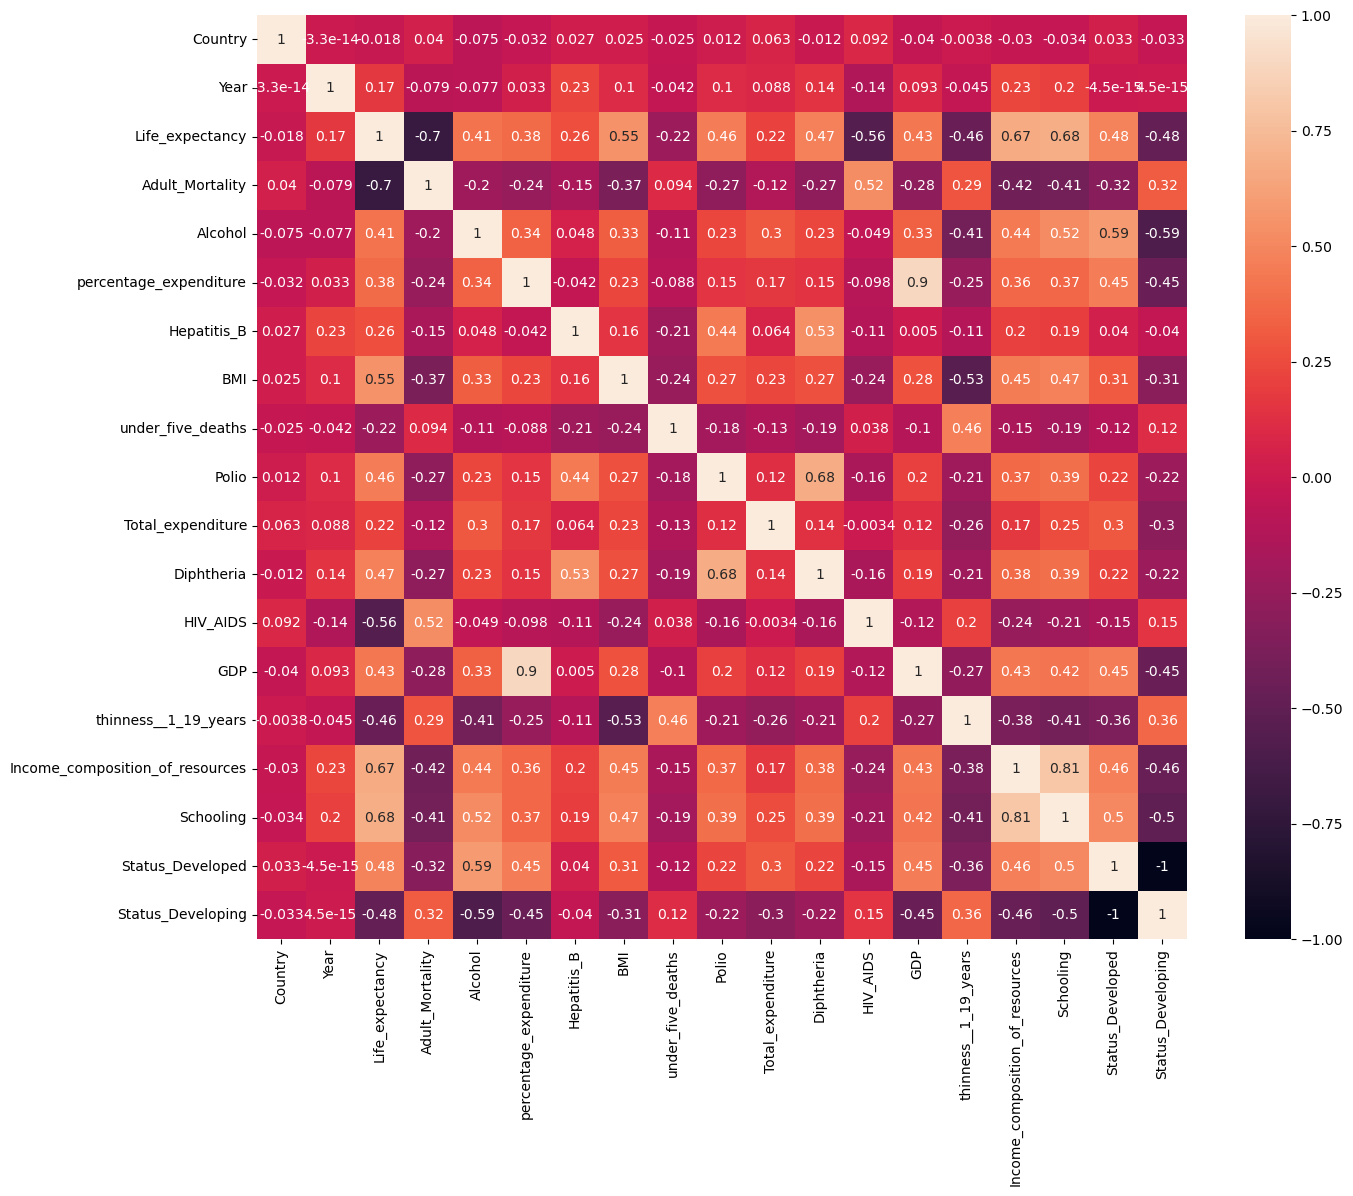

In [305]:
df_encoded_corr = df_encoded.corr(numeric_only=True)

plt.figure(figsize=(15, 12))
sb.heatmap(df_encoded_corr, annot=True)
plt.show()

In [309]:
corr_top = df_encoded[['Life_expectancy', 'Adult_Mortality', 'Income_composition_of_resources', 'Schooling', 'HIV_AIDS', 'BMI']].corr()
corr_top

,Life_expectancy,Adult_Mortality,Income_composition_of_resources,Schooling,HIV_AIDS,BMI
Life_expectancy,1.000000,-0.696359,0.669928,0.681652,-0.556556,0.550109
Adult_Mortality,-0.696359,1.000000,-0.422390,-0.411396,0.523821,-0.373103
Income_composition_of_resources,0.669928,-0.422390,1.000000,0.805446,-0.243759,0.448557
Schooling,0.681652,-0.411396,0.805446,1.000000,-0.214114,0.473126
HIV_AIDS,-0.556556,0.523821,-0.243759,-0.214114,1.000000,-0.241528
BMI,0.550109,-0.373103,0.448557,0.473126,-0.241528,1.000000


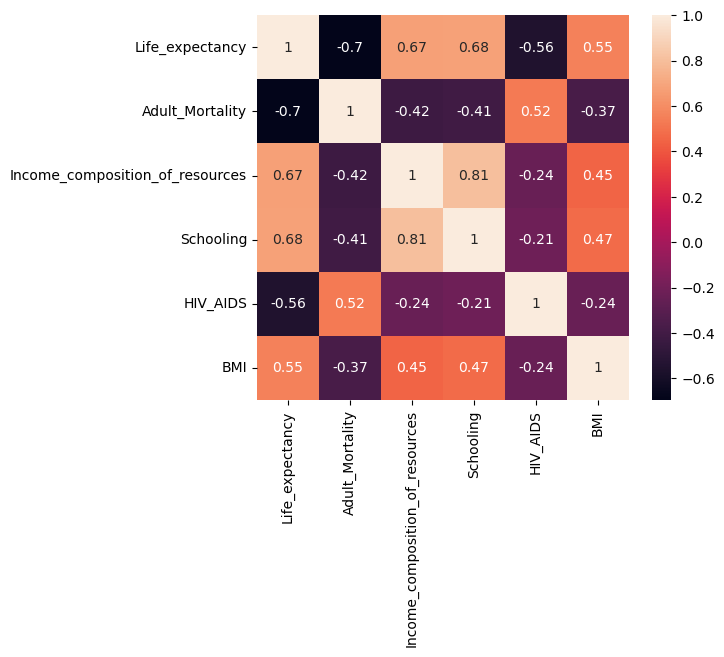

In [319]:
plt.figure(figsize=(6, 5))
sb.heatmap(corr_top, annot=True)
plt.show()

In [54]:
# Set target variable
Y = df_encoded['Life_expectancy']
X = df_encoded.drop(['Life_expectancy'], axis=1)

In [55]:
print(Y.shape, X.shape)

(2928,) (2928, 18)


In [56]:
# Create a copy to modify the train-test split as 80/20
X_copy = X.copy()

In [57]:
# Data splitting 80/20
X_train_copy, X_test_copy, Y_train_copy, Y_test_copy = train_test_split(X_copy, Y, test_size=0.2, random_state=42)

In [58]:
Y_train_copy.shape

(2342,)

In [59]:
X_copy.head(3)

,Country,Year,Adult_Mortality,Alcohol,percentage_expenditure,Hepatitis_B,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,thinness__1_19_years,Income_composition_of_resources,Schooling,Status_Developed,Status_Developing
15,0,2000,321.0,0.01,10.424960,62.0,12.2,122,24.0,8.20,24.0,0.1,114.56000,2.3,0.338,5.5,0,1
14,0,2001,316.0,0.01,10.574728,63.0,12.6,122,35.0,7.80,33.0,0.1,117.49698,2.1,0.340,5.9,0,1
13,0,2002,3.0,0.01,16.887351,64.0,13.0,122,36.0,7.76,36.0,0.1,187.84595,19.9,0.341,6.2,0,1


In [60]:
# Data splitting 60/40
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [61]:
Y_train.shape

(1756,)

In [62]:
X_train.columns.values

array(['Country', 'Year', 'Adult_Mortality', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'thinness__1_19_years',
       'Income_composition_of_resources', 'Schooling', 'Status_Developed',
       'Status_Developing'], dtype=object)

#### Plot histogram of each variable within X_train to verify if they have Gaussian-like distribution and to point to possible outliers presence. 
    - Quantile transformation was used to handle outliers, but only the variables' structure changed and outliers were still present. Only 'BMI' and 'Total_expenditure' showed an improvement.
    - Clipp methos was also applied in a range from 0.02 to 0.98 percentiles but resulted on the clustering of data on tha tails.

array([[<Axes: title={'center': 'Country'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Adult_Mortality'}>,
        <Axes: title={'center': 'Alcohol'}>],
       [<Axes: title={'center': 'percentage_expenditure'}>,
        <Axes: title={'center': 'Hepatitis_B'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'under_five_deaths'}>],
       [<Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total_expenditure'}>,
        <Axes: title={'center': 'Diphtheria'}>,
        <Axes: title={'center': 'HIV_AIDS'}>],
       [<Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'thinness__1_19_years'}>,
        <Axes: title={'center': 'Income_composition_of_resources'}>,
        <Axes: title={'center': 'Schooling'}>],
       [<Axes: title={'center': 'Status_Developed'}>,
        <Axes: title={'center': 'Status_Developing'}>, <Axes: >,
        <Axes: >]], dtype=object)

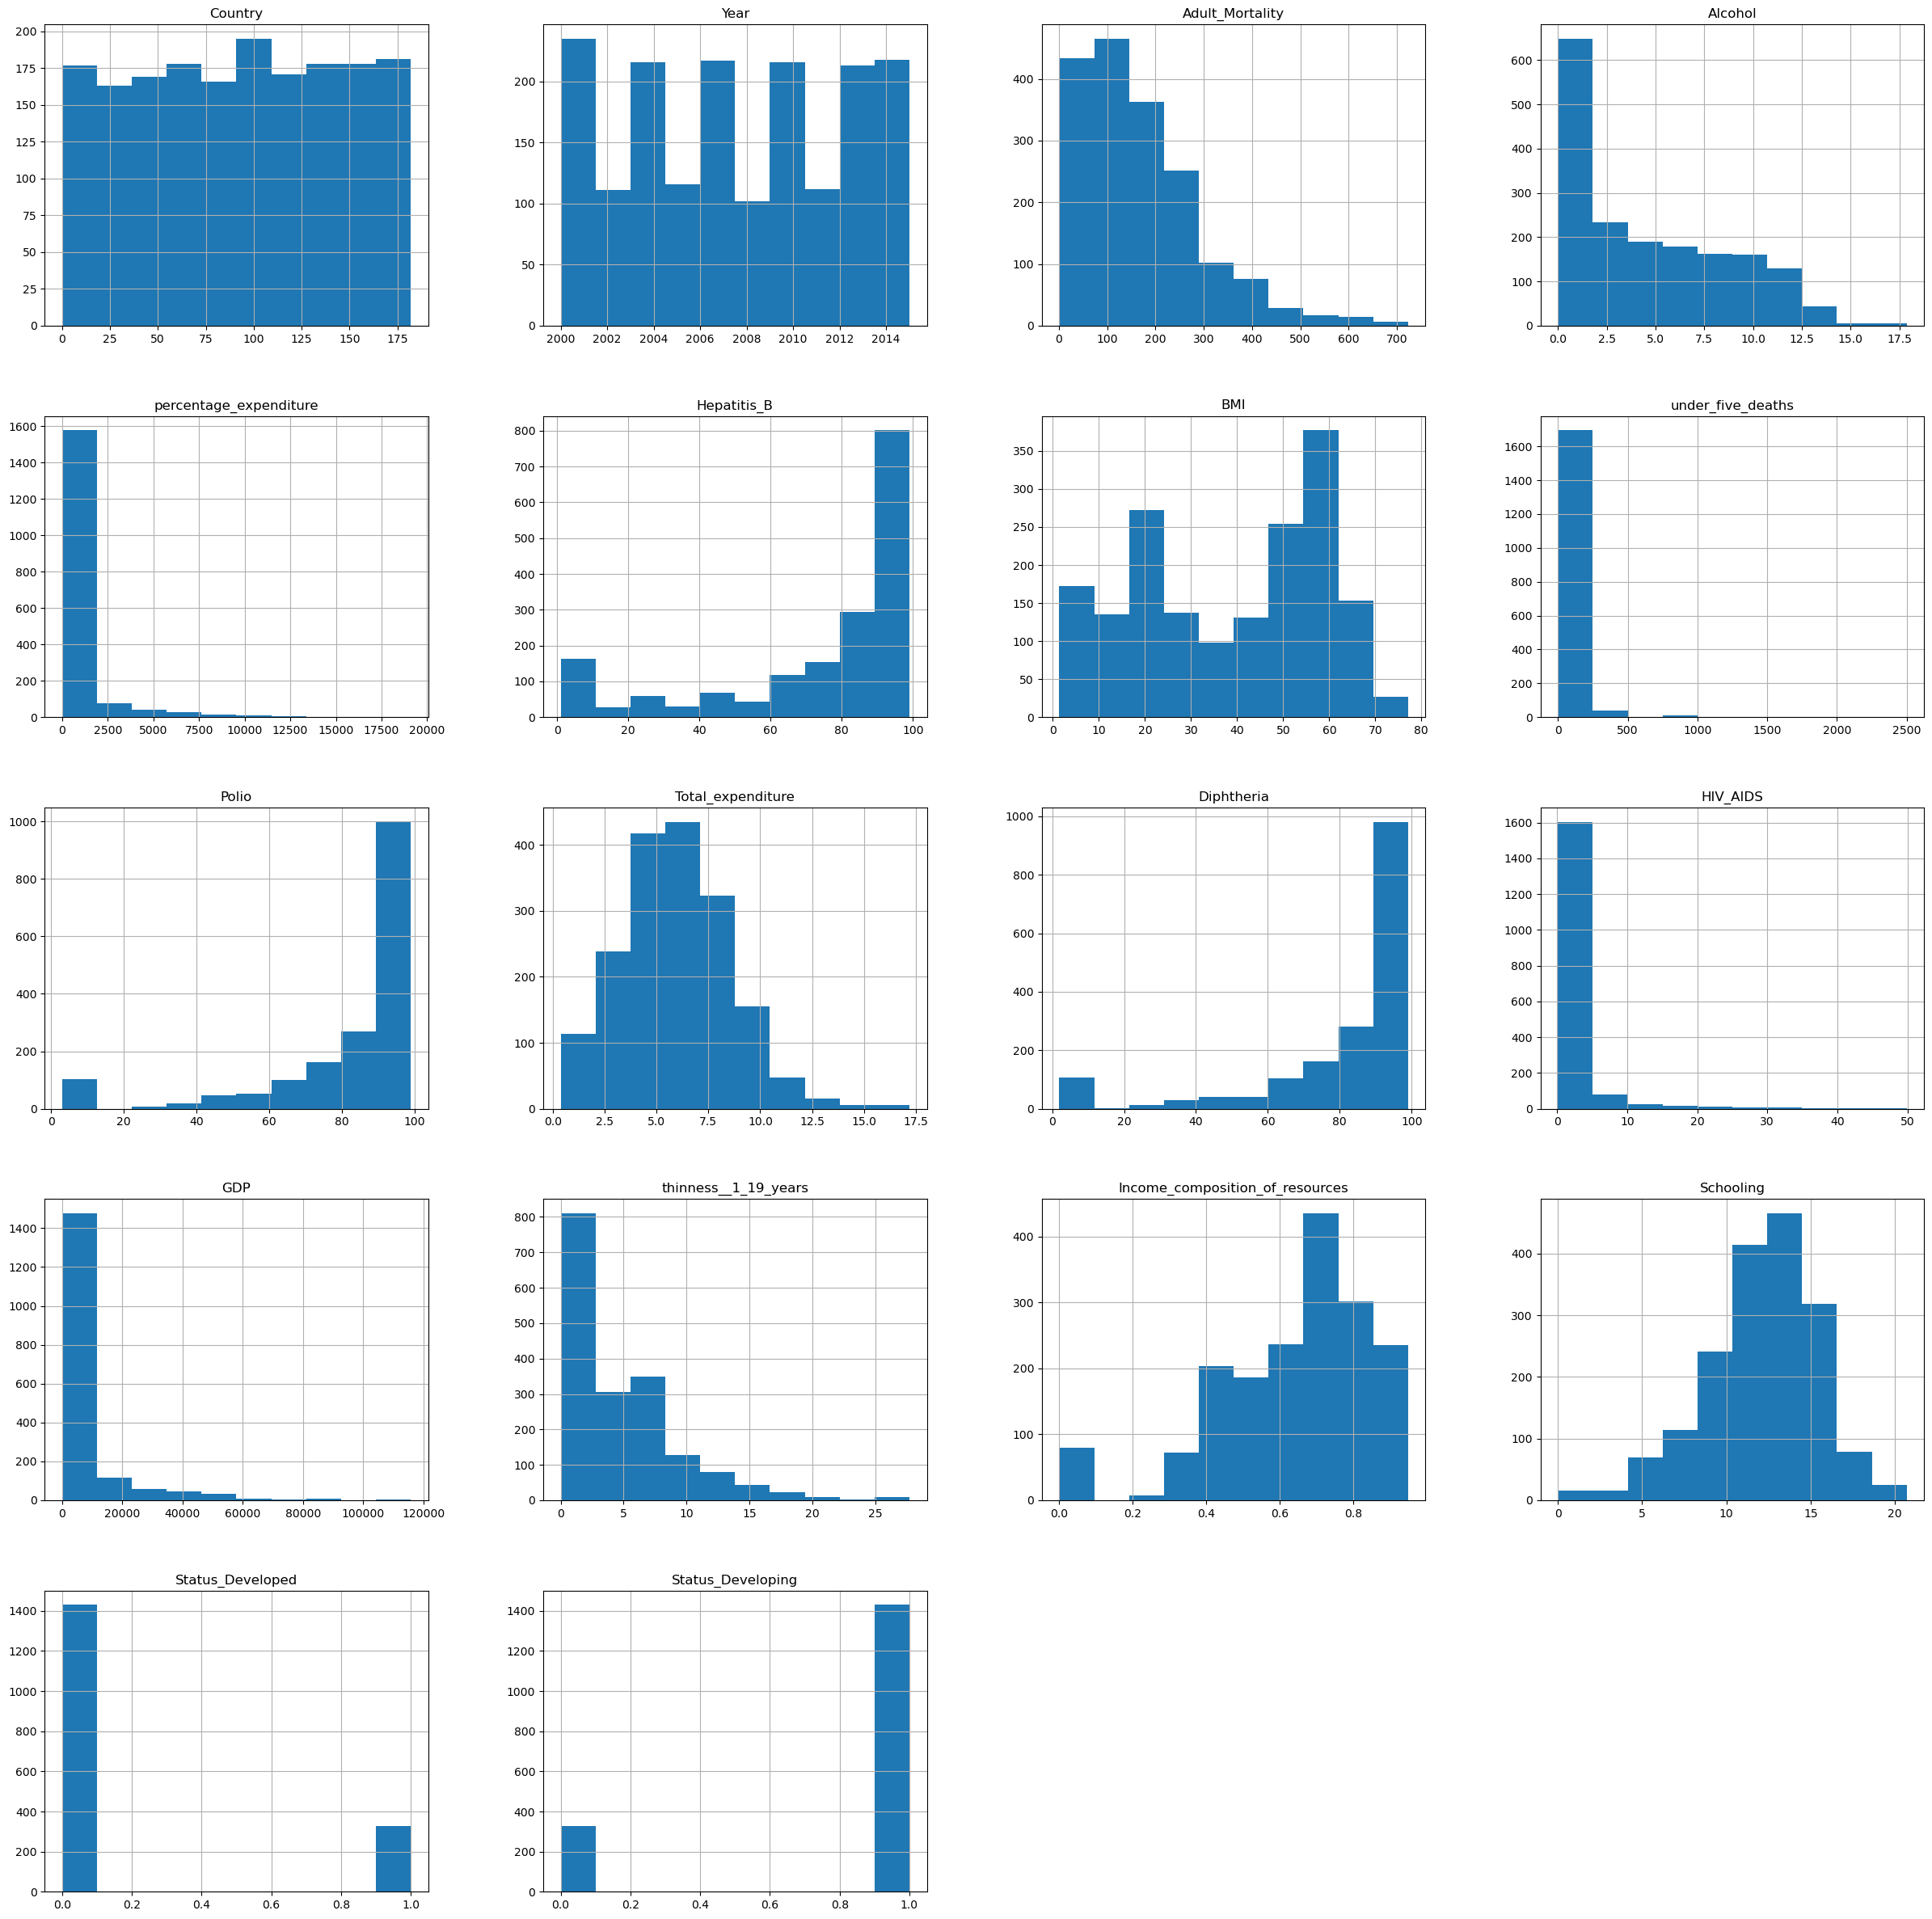

In [64]:
# Histogram for independent features
X_train.hist(figsize=(30, 30))

#### Most of the features present positive and negative skewness, Yeo-Jonson and Square methods are the most suitable methods to deal with, respectively. At the same time, this will help handle outliers

In [66]:
original_skewness = X_train[['Adult_Mortality', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'thinness__1_19_years',
       'Income_composition_of_resources', 'Schooling']].skew()
original_skewness

Adult_Mortality                    1.208761
Alcohol                            0.598122
percentage_expenditure             4.500919
Hepatitis_B                       -1.292761
BMI                               -0.238614
under_five_deaths                  9.093222
Polio                             -2.042938
Total_expenditure                  0.553236
Diphtheria                        -1.966995
HIV_AIDS                           5.345659
GDP                                3.366772
thinness__1_19_years               1.714831
Income_composition_of_resources   -1.188189
Schooling                         -0.621177
dtype: float64

In [67]:
original_skewness_copy = X_train_copy[['Adult_Mortality', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'thinness__1_19_years',
       'Income_composition_of_resources', 'Schooling']].skew()
original_skewness_copy

Adult_Mortality                    1.174860
Alcohol                            0.605232
percentage_expenditure             4.582351
Hepatitis_B                       -1.302199
BMI                               -0.217498
under_five_deaths                  9.591317
Polio                             -2.031430
Total_expenditure                  0.545584
Diphtheria                        -1.991048
HIV_AIDS                           5.172174
GDP                                3.419403
thinness__1_19_years               1.667631
Income_composition_of_resources   -1.182098
Schooling                         -0.601875
dtype: float64

In [68]:
positive_skewed = original_skewness[original_skewness>=.5].index
negative_skewed = original_skewness[original_skewness<= -.5].index
symmetric_distributed = original_skewness['BMI']

In [69]:
positive_skewed_copy = original_skewness_copy[original_skewness_copy>=.5].index
negative_skewed_copy = original_skewness_copy[original_skewness_copy<= -.5].index
symmetric_distributed_copy = original_skewness_copy['BMI']

In [70]:
# Skewness function
def calculate_skewness(df):
    return df.apply(skew)

In [71]:
# Handle positive skewness
yeo_transformer = PowerTransformer(method='yeo-johnson', standardize=False)
X_train[positive_skewed] = yeo_transformer.fit_transform(X_train[positive_skewed])

X_test[positive_skewed] = yeo_transformer.transform(X_test[positive_skewed])

In [72]:
# Handle positive skewness on copy data
yeo_transformer = PowerTransformer(method='yeo-johnson', standardize=False)
X_train_copy[positive_skewed_copy] = yeo_transformer.fit_transform(X_train_copy[positive_skewed])

X_test_copy[positive_skewed_copy] = yeo_transformer.transform(X_test_copy[positive_skewed_copy])

#### At difference to train data, test data should just be transformed. This aims to keep split data consistency.

In [74]:
square_transformer = FunctionTransformer(np.square, validate=True)
X_train[negative_skewed] = square_transformer.fit_transform(X_train[negative_skewed])

X_test[negative_skewed] = square_transformer.transform(X_test[negative_skewed])

In [75]:
square_transformer = FunctionTransformer(np.square, validate=True)
X_train_copy[negative_skewed_copy] = square_transformer.fit_transform(X_train_copy[negative_skewed_copy])

X_test_copy[negative_skewed_copy] = square_transformer.transform(X_test_copy[negative_skewed_copy])

#### A skewed value between -0.5 and 0.5 can be considered symmetric.

In [77]:
print("Coefficients after handling skewness:")
X_train[['Adult_Mortality', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'thinness__1_19_years',
       'Income_composition_of_resources', 'Schooling']].skew()


Coefficients after handling skewness:


Adult_Mortality                   -0.074314
Alcohol                           -0.076648
percentage_expenditure            -0.016051
Hepatitis_B                       -0.816281
BMI                               -0.238614
under_five_deaths                  0.175045
Polio                             -1.297189
Total_expenditure                 -0.005089
Diphtheria                        -1.284186
HIV_AIDS                           0.975154
GDP                               -0.004446
thinness__1_19_years               0.014425
Income_composition_of_resources   -0.164034
Schooling                          0.345672
dtype: float64

In [78]:
print("Coefficients on copy data after handling skewness:")
X_train_copy[['Adult_Mortality', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'thinness__1_19_years',
       'Income_composition_of_resources', 'Schooling']].skew()


Coefficients on copy data after handling skewness:


Adult_Mortality                   -0.081707
Alcohol                           -0.077520
percentage_expenditure            -0.013726
Hepatitis_B                       -0.820034
BMI                               -0.217498
under_five_deaths                  0.170664
Polio                             -1.296111
Total_expenditure                 -0.003883
Diphtheria                        -1.297169
HIV_AIDS                           0.949498
GDP                               -0.004826
thinness__1_19_years               0.012160
Income_composition_of_resources   -0.141225
Schooling                          0.372600
dtype: float64

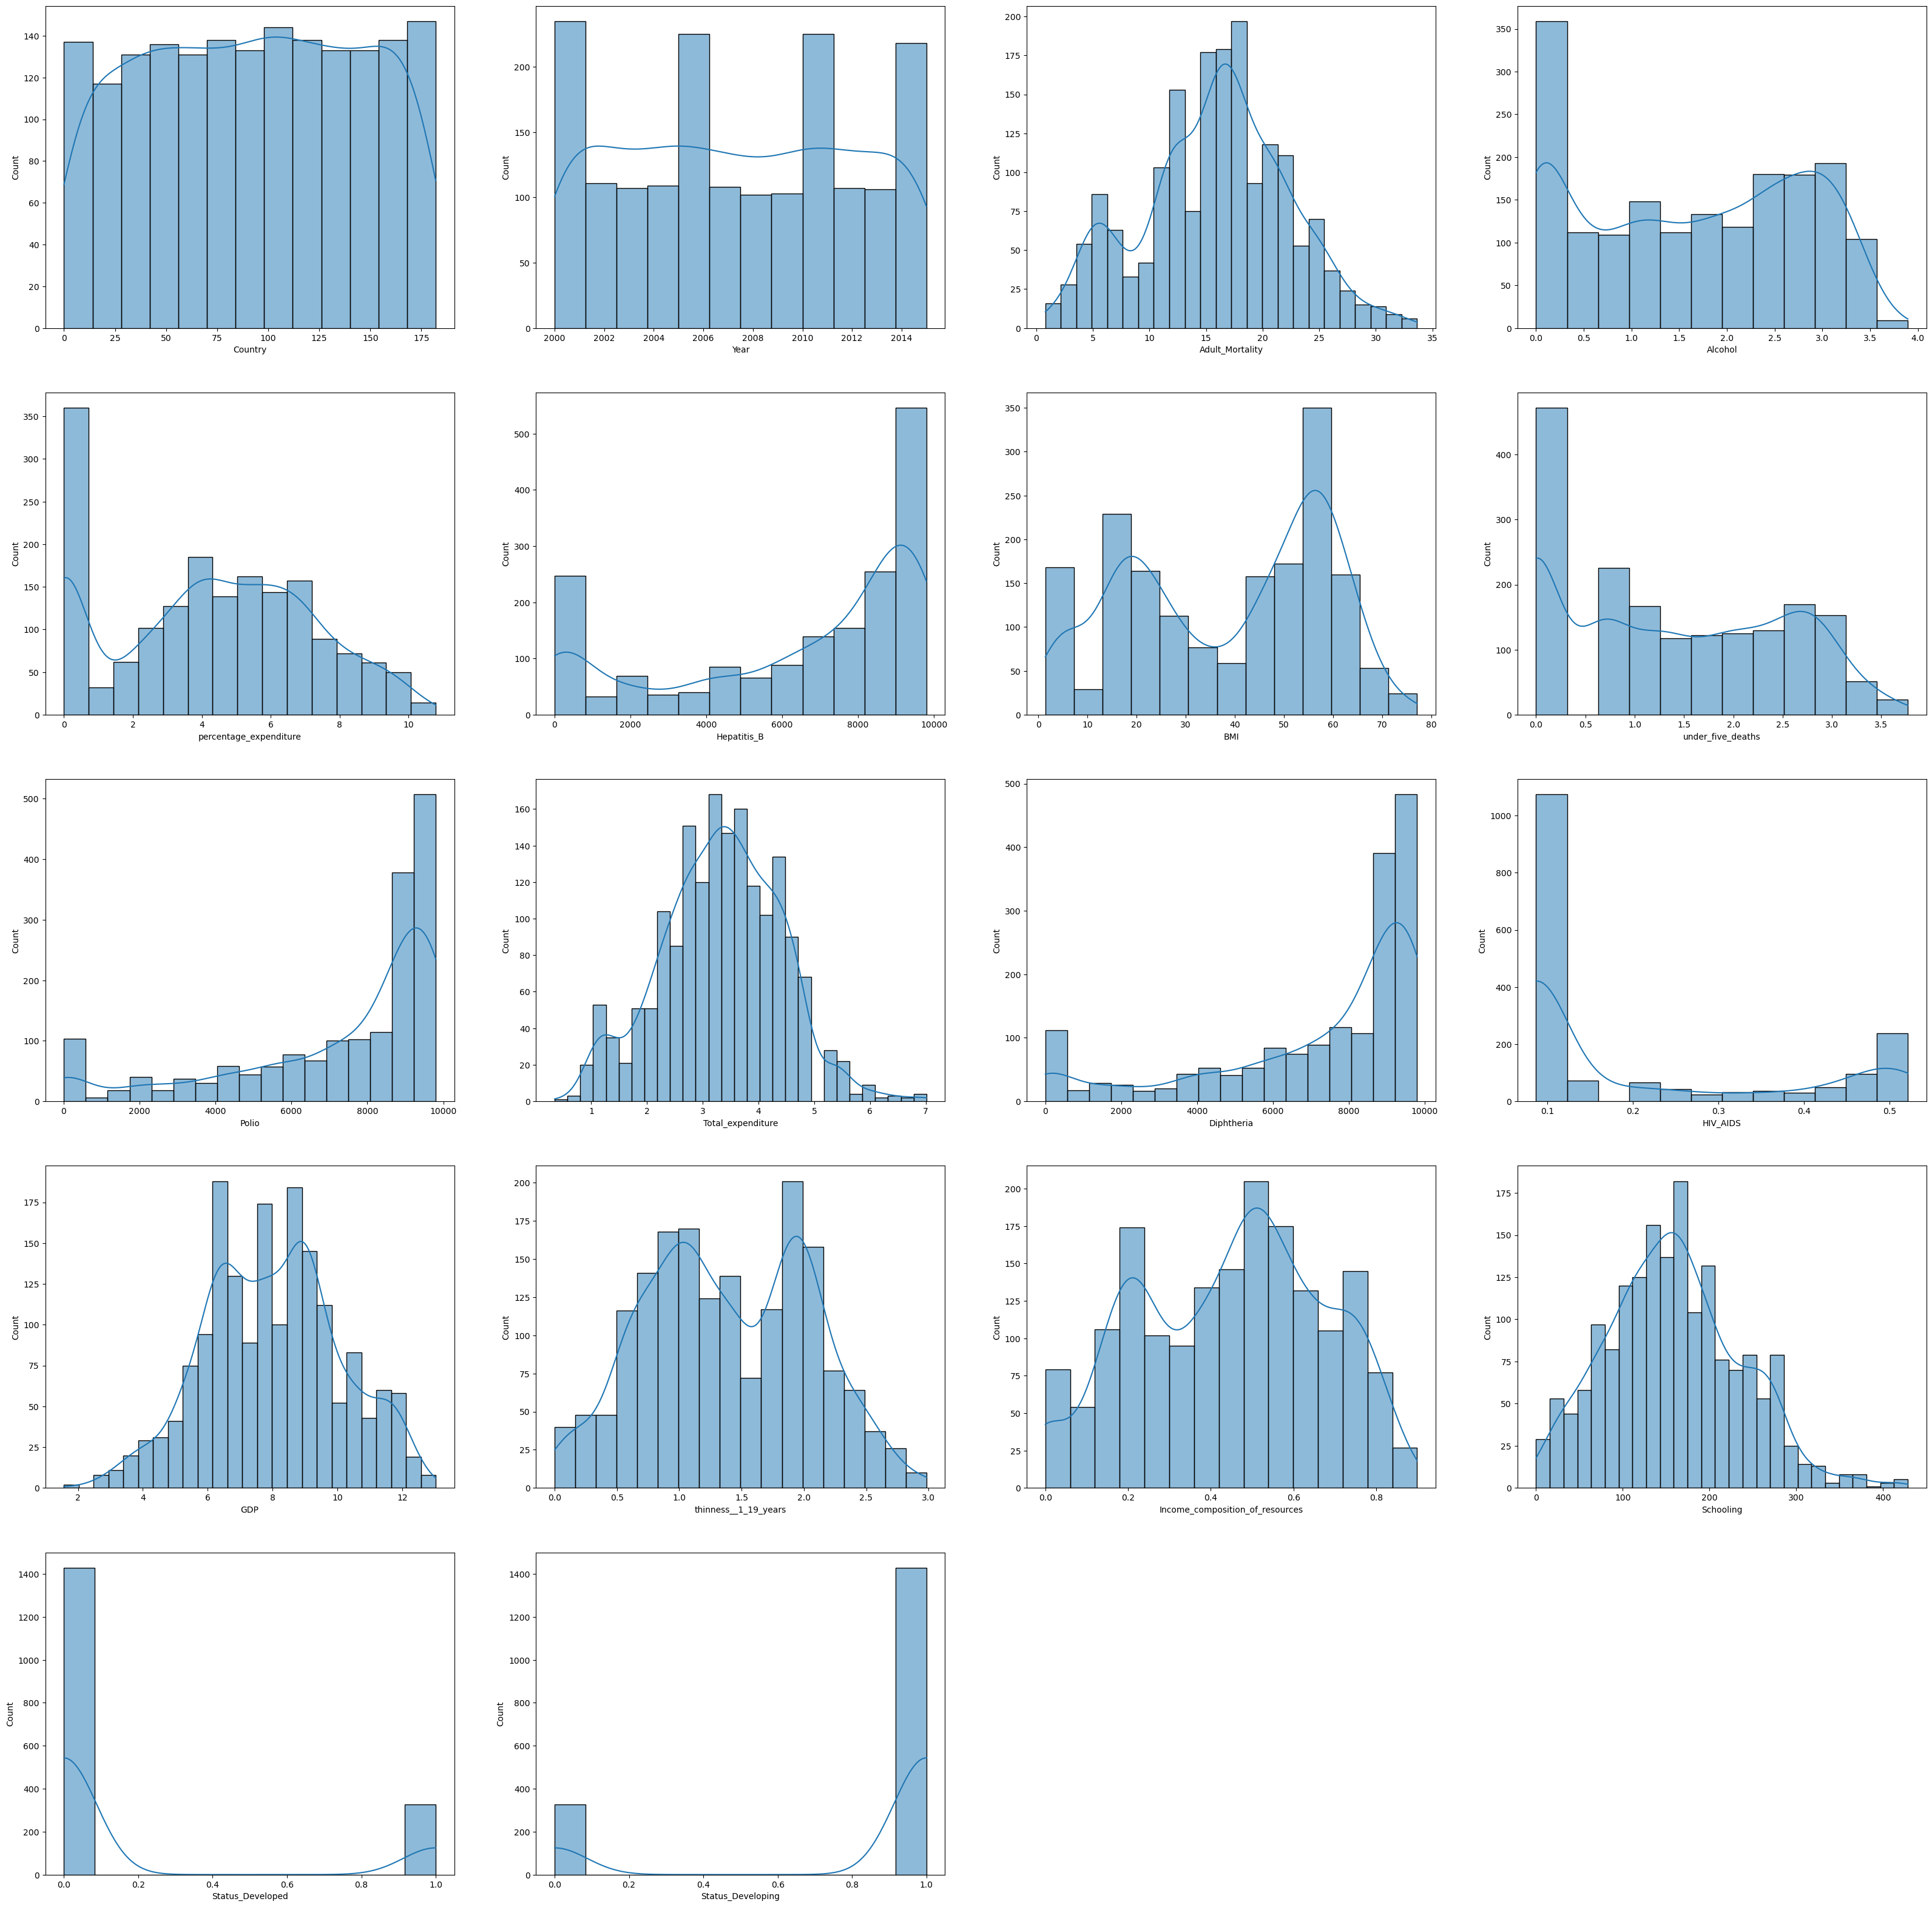

In [79]:
# Histogram for independent features after handling skewness
# X_train.hist(figsize=(30, 30))

fig = plt.figure(figsize= (40, 40))
c = 1
for col in X_train:
    plt.subplot(5, 4,c)
    g = sb.histplot(X_train[col], kde=True)
    g.set(xlabel = col)
    c = c + 1

#### To scale the values, MinMaxScaler method will be apply, due to the not-normally distributed data
        - Robust scaler was used before and helped normalizing the data, but the outliers werent removed
        - Another try was using QuantileTransformer but the structured of the data was significantly swaped and there were still few outliers
        - Clip method was also tried, but since clip works with interquantiles, to change the outliers value at the closest one inside the quartile range, the tails on each feature went up

In [81]:
X_train.head(3)

,Country,Year,Adult_Mortality,Alcohol,percentage_expenditure,Hepatitis_B,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,thinness__1_19_years,Income_composition_of_resources,Schooling,Status_Developed,Status_Developing
2839,176,2002,18.310287,0.983775,3.355687,3844.0,35.9,2.451924,9801.0,3.208408,9801.0,0.153853,6.295815,1.384878,0.360000,121.00,0,1
2817,175,2008,14.868001,2.488625,3.344903,8836.0,6.1,0.643622,8836.0,4.271292,8836.0,0.087105,7.331835,0.923491,0.592900,246.49,0,1
2896,180,2009,20.381758,0.029639,0.000000,5776.0,36.4,2.611556,5776.0,3.157317,5776.0,0.087105,6.168567,2.450126,0.233289,70.56,0,1


In [82]:
#MinMax Scaling
minmax_scaler = MinMaxScaler()
#fit_transform to take the dataframe and scale it
scaled_X_train = minmax_scaler.fit_transform(X_train)
scaled_X_test = minmax_scaler.transform(X_test)

In [83]:
#MinMax Scaling on copy data
#fit_transform to take the dataframe and scale it
scaled_X_train_copy = minmax_scaler.fit_transform(X_train_copy)
scaled_X_test_copy = minmax_scaler.transform(X_test_copy)

In [84]:
# Make dataseries into dataframe again
scaled_df_X_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
scaled_df_X_train
scaled_df_X_test = pd.DataFrame(scaled_X_test, columns=X_test.columns)

In [85]:
# Make dataseries of copy into dataframe again
scaled_df_X_train_copy = pd.DataFrame(scaled_X_train_copy, columns=X_train_copy.columns)
scaled_df_X_train_copy
scaled_df_X_test_copy = pd.DataFrame(scaled_X_test_copy, columns=X_test_copy.columns)

In [86]:
scaled_df_X_test.head(3)

,Country,Year,Adult_Mortality,Alcohol,percentage_expenditure,Hepatitis_B,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,thinness__1_19_years,Income_composition_of_resources,Schooling,Status_Developed,Status_Developing
0,0.818681,0.400000,0.843374,0.715904,0.649372,0.702857,0.566711,0.754576,0.636438,0.556222,0.685924,0.99877,0.681053,0.309564,0.412684,0.388364,0.0,1.0
1,0.065934,0.266667,0.492484,0.002556,0.153516,0.012245,0.140026,0.853862,0.789931,0.226985,1.000000,0.00000,0.213074,0.364272,0.268254,0.153119,0.0,1.0
2,0.791209,0.200000,0.333718,0.247571,0.768317,0.920816,0.372523,0.000000,0.940257,0.305963,0.940288,0.00000,0.829848,0.364272,0.746365,0.376415,1.0,0.0


array([[<Axes: title={'center': 'Country'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Adult_Mortality'}>,
        <Axes: title={'center': 'Alcohol'}>],
       [<Axes: title={'center': 'percentage_expenditure'}>,
        <Axes: title={'center': 'Hepatitis_B'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'under_five_deaths'}>],
       [<Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total_expenditure'}>,
        <Axes: title={'center': 'Diphtheria'}>,
        <Axes: title={'center': 'HIV_AIDS'}>],
       [<Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'thinness__1_19_years'}>,
        <Axes: title={'center': 'Income_composition_of_resources'}>,
        <Axes: title={'center': 'Schooling'}>],
       [<Axes: title={'center': 'Status_Developed'}>,
        <Axes: title={'center': 'Status_Developing'}>, <Axes: >,
        <Axes: >]], dtype=object)

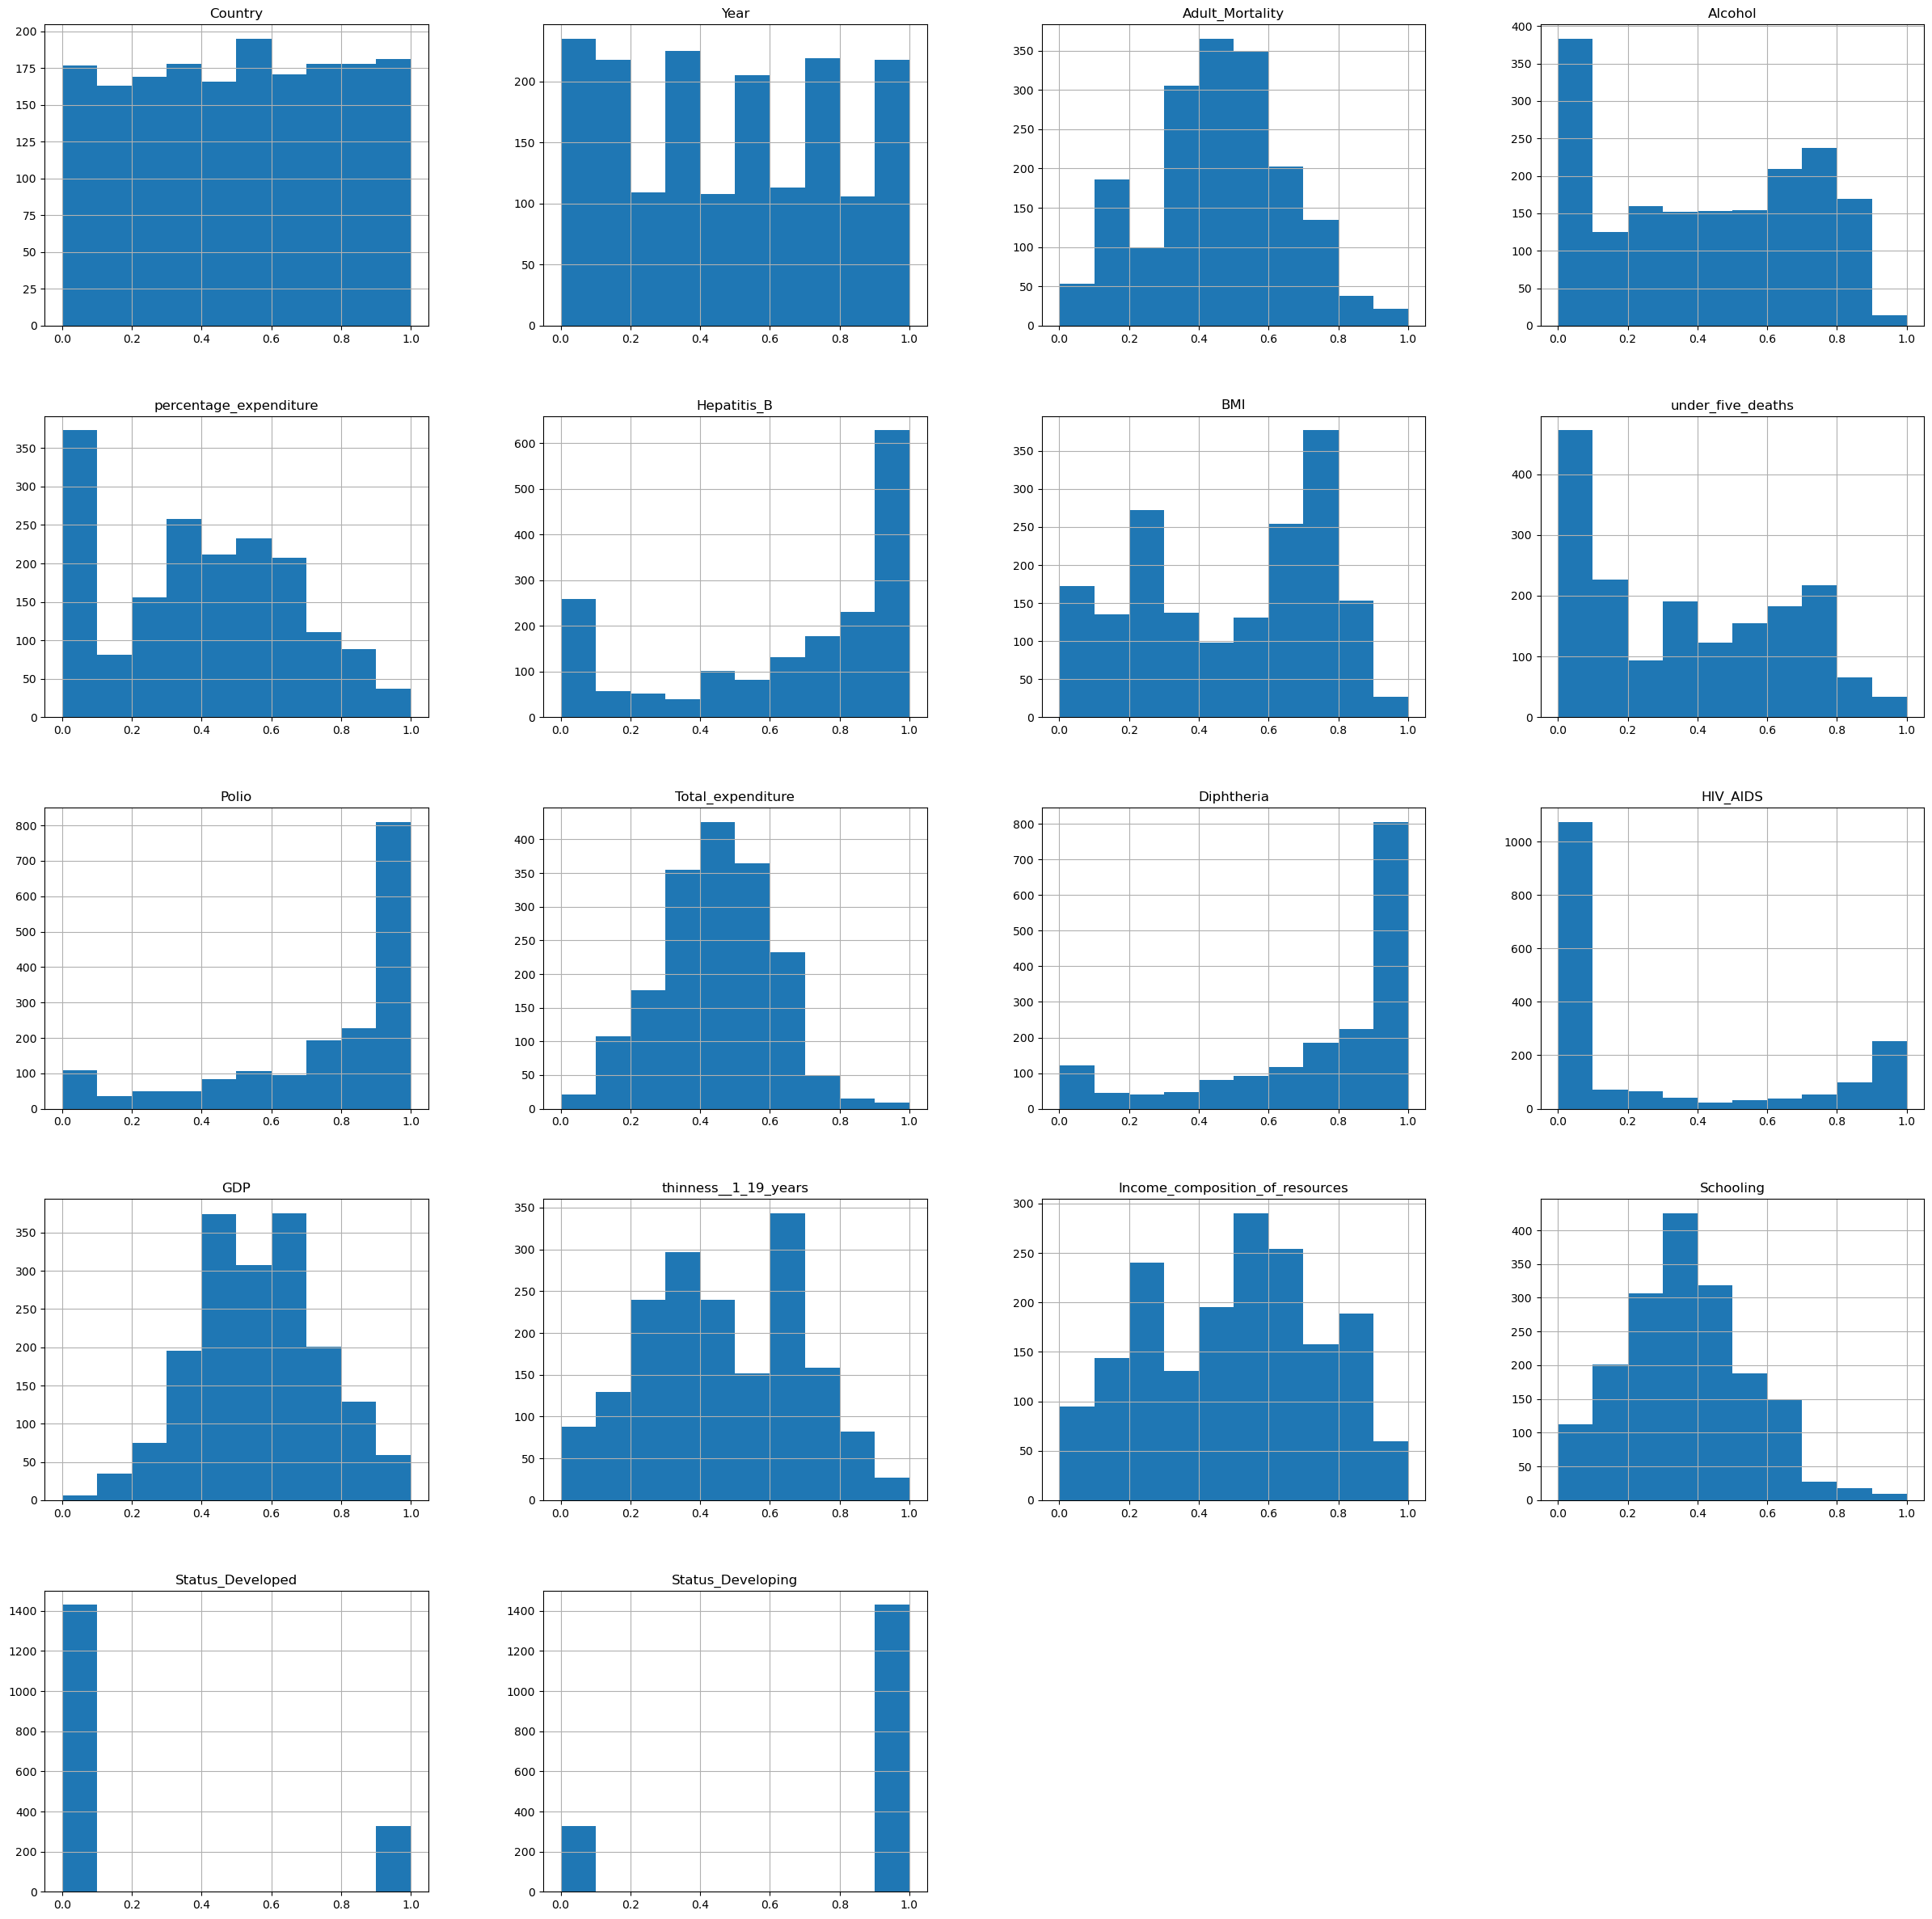

In [87]:
# Histogram for independent features
scaled_df_X_train.hist(figsize=(30, 30))

#### Perform Principal Component Analysis (PCA) to reduce dimensionality.

#### To avoid mismatches, ensure consistent features selection either for train and test data

In [90]:
# Feature selection 
X_train_top = scaled_df_X_train[['Adult_Mortality', 'Income_composition_of_resources', 'Schooling', 'HIV_AIDS', 'BMI']]
X_test_top = scaled_df_X_test[['Adult_Mortality', 'Income_composition_of_resources', 'Schooling', 'HIV_AIDS', 'BMI']]

In [91]:
# Feature selection for copy data
X_train_top_copy = scaled_df_X_train_copy[['Adult_Mortality', 'Income_composition_of_resources', 'Schooling', 'HIV_AIDS', 'BMI']]
X_test_top_copy = scaled_df_X_test_copy[['Adult_Mortality', 'Income_composition_of_resources', 'Schooling', 'HIV_AIDS', 'BMI']]

## 4. Model Building

### Build a multilinear regression model with the top 5 features over 60/40 splitted data

In [94]:
X_train_top.head(0)

,Adult_Mortality,Income_composition_of_resources,Schooling,HIV_AIDS,BMI


In [95]:
X_train_top.shape

(1756, 5)

#### Using the top 5 features to build a multiple linear regression model

In [97]:
# Apply linear regression
lr = LinearRegression()
lr.fit(X_train_top, Y_train)

LinearRegression()

In [98]:
lr.coef_

array([ -7.64348829,  12.77301735,   2.74793515, -11.99738556,
         2.35962782])

In [99]:
intercept = lr.intercept_
lr.intercept_

67.33611637761908

In [100]:
# Return r2 score for train data
lr.score(X_train_top, Y_train)

0.7973202586255623

In [101]:
# Return r2 score for test data
lr.score(X_test_top, Y_test)

0.7982056906482318

In [102]:
Y_pred = lr.predict(X_test_top)
Y_pred

array([56.58280954, 67.74940461, 76.23205881, ..., 79.33692223,
       71.72080499, 64.59246324])

### Find and plot the best fit line for each top independet feature

#### As Adult Mortality increases, Life Expectancy slightly decreases, which makes sense since higher adult mortality typically suggests poorer health conditions. The best-fit line shows a weak negative trend while the spread in the data indicates Adult Mortality it's not the only factor impacting life expectancy

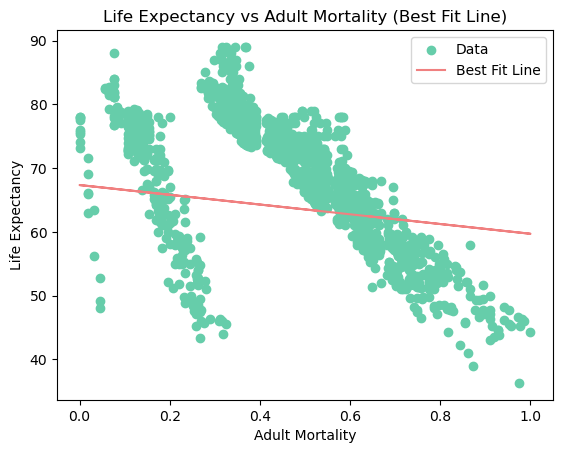

In [105]:
#Plot the best fit line for training data. Adult Mortality vs Life expectancy
adult_mortality_coef = lr.coef_[0]

X_adult_mortality = scaled_df_X_train['Adult_Mortality']
y_pred_lf = adult_mortality_coef * X_adult_mortality + intercept

plt.scatter(X_adult_mortality, Y_train, color='mediumaquamarine', label='Data')
plt.plot(X_adult_mortality, y_pred_lf, color='lightcoral', label='Best Fit Line')
plt.xlabel('Adult Mortality')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Adult Mortality (Best Fit Line)')
plt.legend()

#### The positive slope of the best-fit line suggests a stronger relationship, as Income Composition of Resources increases, Life Expectancy generally increases. 
#### Higher values in this feature are associated with better resource access, often translating to better health care, education, and overall living conditions, which positively affect life expectancy. This feature might be a key predictor for this model

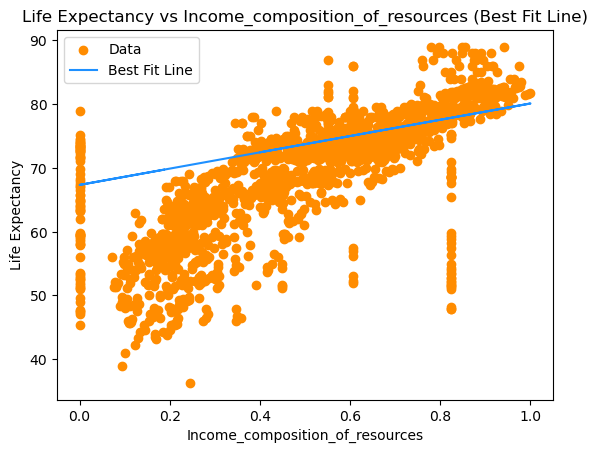

In [107]:
#Plot the best fit line for training data. Income_composition_of_resources vs Life expectancy
income_coef = lr.coef_[1]

X_income_1 = scaled_df_X_train['Income_composition_of_resources']
y_pred_lf_1 = income_coef * X_income_1 + intercept

plt.scatter(X_income_1, Y_train, color='darkorange', label='Data')
plt.plot(X_income_1, y_pred_lf_1, color='dodgerblue', label='Best Fit Line')
plt.xlabel('Income_composition_of_resources')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Income_composition_of_resources (Best Fit Line)')
plt.legend()

#### Even though life expectancy may increase slightly with schooling, it’s not enough to create a noticeable slope in a linear regression

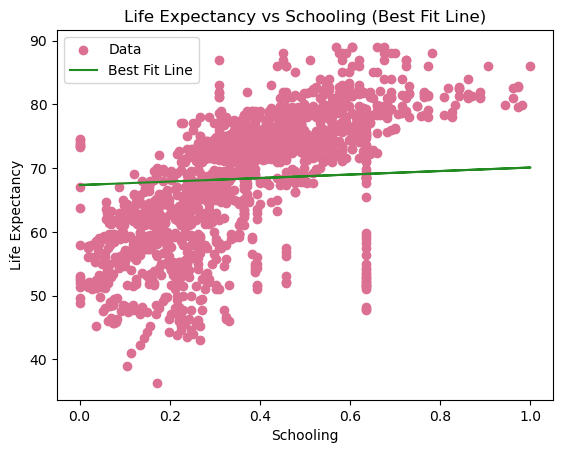

In [109]:
#Plot the best fit line for training data. Schooling vs Life expectancy
schooling_coef = lr.coef_[2]

X_schooling = scaled_df_X_train['Schooling']
y_pred_lf_2 = schooling_coef * X_schooling + intercept

plt.scatter(X_schooling, Y_train, color='palevioletred', label='Data')
plt.plot(X_schooling, y_pred_lf_2, color='forestgreen', label='Best Fit Line')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Schooling (Best Fit Line)')
plt.legend()

#### The downward slope of the best-fit line indicates a negative relationship, meaning that as HIV/AIDS prevalence increases, life expectancy tends to decrease. This is a logical relationship since higher HIV/AIDS rates can severely impact public health, reducing life expectancy.
#### At low HIV/AIDS rates, life expectancy becomes less predictable based on this feature alone

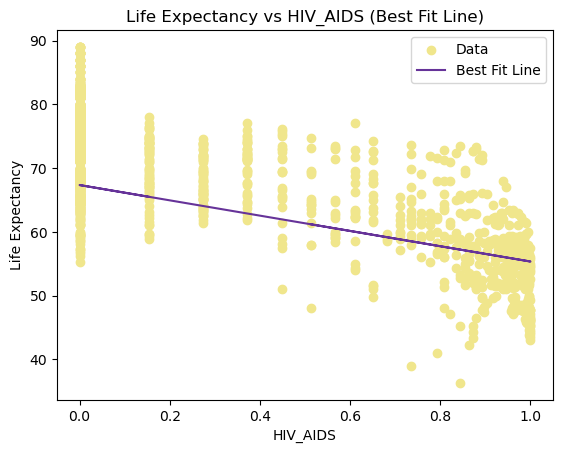

In [111]:
#Plot the best fit line for training data. HIV_AIDS vs Life expectancy
HIV_coef = lr.coef_[3]

X_HIV = scaled_df_X_train['HIV_AIDS']
y_pred_lf_3 = HIV_coef * X_HIV + intercept

plt.scatter(X_HIV, Y_train, color='khaki', label='Data')
plt.plot(X_HIV, y_pred_lf_3, color='rebeccapurple', label='Best Fit Line')
plt.xlabel('HIV_AIDS')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs HIV_AIDS (Best Fit Line)')
plt.legend()

#### Since the fit line has a slight positive slope, it indicates a weak positive correlation between BMI and life expectancy. As BMI increases, life expectancy also increases slightly, The spread of the data means BMI is not a dominant predictor by itself.

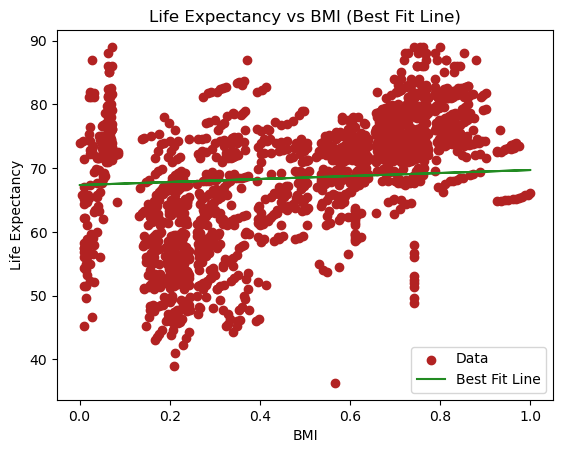

In [113]:
#Plot the best fit line for training data. BMI vs Life expectancy
BMI_coef = lr.coef_[4]

X_BMI = scaled_df_X_train['BMI']
y_pred_lf_4 = BMI_coef * X_BMI + intercept

plt.scatter(X_BMI, Y_train, color='firebrick', label='Data')
plt.plot(X_BMI, y_pred_lf_4, color='forestgreen', label='Best Fit Line')
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs BMI (Best Fit Line)')
plt.legend()

## 5. Model Evaluation and tuning

In [115]:
#Dataframe for predicted and actual values
results_diff = pd.DataFrame({'Predicted Value': Y_pred, 'Actual Value': Y_test})
results_diff

,Predicted Value,Actual Value
2402,56.582810,54.0
203,67.749405,67.3
2325,76.232059,79.3
1744,65.510064,73.5
1093,54.467481,57.6
...,...,...
2544,71.033074,73.8
1408,76.418564,73.2
124,79.336922,83.0
2452,71.720805,69.1


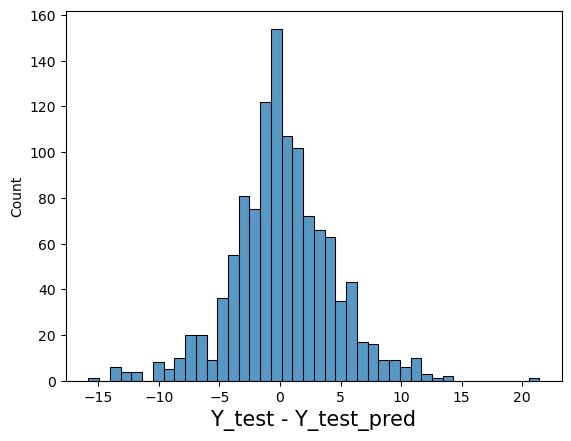

In [116]:
#Plot the histogram for the error/cost function 
fig = plt.figure()
sb.histplot(Y_test - Y_pred)
plt.xlabel('Y_test - Y_test_pred', fontsize = 15)  
plt.show()

#### Overall, the model explains  a significant proportion of the variance in life expectancy, which suggests that the selected features (Adult Mortality, Income Composition of Resources, Schooling, HIV/AIDS, and BMI) are relevant predictors of life expectancy.

    - MAE: On average, the multiple linear regression model's predictions deviate from the actual values by about 3.10 years of life expectancy.
    - MSE: An MSE of 17.71 suggests that the model has a reasonable level of error. 
    - r2 coefficient: The model using the selected features can explain about 79.82% of the variance in life expectancy.

In [333]:
#Compute the metrics
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Absolute Error: {mae:.4f}")
print(f'Mean Squared Error: {mse:.4f}')
print(f'R2 coefficient: {r2:.4f}')

Mean Absolute Error: 3.1010
Mean Squared Error: 17.7075
R2 coefficient: 0.7982


### Build a simple linear regression model with the top feature over 60/40 splitted dataa

#### Income_composition_of_resources was chosen as the key feature to predict life expectancy in a simple linear regression model.

In [121]:
X_income = scaled_df_X_train[['Income_composition_of_resources']]
X_test_income = scaled_df_X_test[['Income_composition_of_resources']]
Y_train = df_encoded['Life_expectancy'].loc[X_train.index] 
Y_test = df_encoded['Life_expectancy'].loc[X_test.index]

In [122]:
lr_income = LinearRegression()
lr_income.fit(X_income, Y_train)

LinearRegression()

In [123]:
lr_income.coef_

array([29.17728665])

In [124]:
intercept_income = lr_income.intercept_
intercept_income

54.6468918428684

In [125]:
# Return r2 score for train data
lr_income.score(X_income, Y_train)

0.5691475713897121

In [126]:
# Return r2 score for test data
lr_income.score(X_test_income, Y_test)

0.5519368896849255

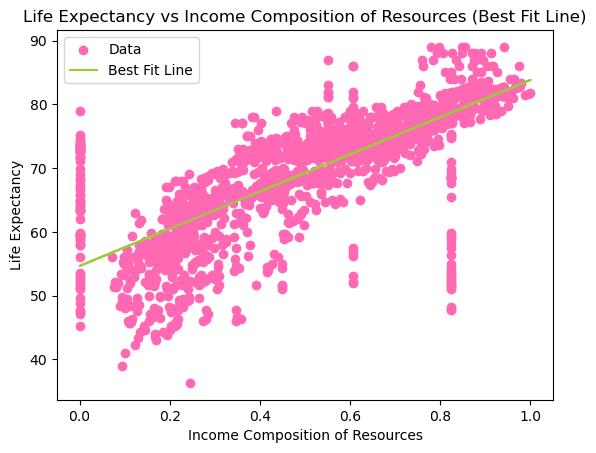

In [127]:
y_pred_income = lr_income.predict(X_income)

# Plot
plt.scatter(X_income, Y_train, color='hotpink', label='Data')
plt.plot(X_income, y_pred_income, color='yellowgreen', label='Best Fit Line')
plt.xlabel('Income Composition of Resources')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Income Composition of Resources (Best Fit Line)')
plt.legend()
plt.show()

In [128]:
#Predict data
Y_pred_income = lr_income.predict(X_test_income)
Y_pred_income

array([66.68789895, 62.47381755, 76.42379054, ..., 81.23732339,
       70.7832848 , 63.62944334])

In [129]:
#Dataframe for predicted and actual values on simple linear regression model
results_diff_income = pd.DataFrame({'Predicted Value': Y_pred_income, 'Actual Value': Y_test})
results_diff_income

,Predicted Value,Actual Value
2402,66.687899,54.0
203,62.473818,67.3
2325,76.423791,79.3
1744,54.646892,73.5
1093,60.265321,57.6
...,...,...
2544,68.405997,73.8
1408,74.704231,73.2
124,81.237323,83.0
2452,70.783285,69.1


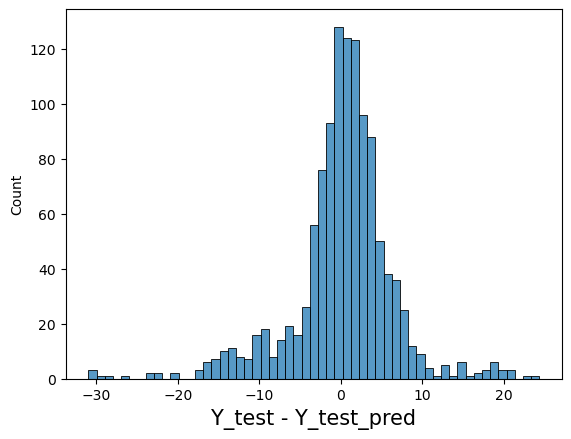

In [130]:
#Plot the histogram for the error/cost function 
fig = plt.figure()
sb.histplot(Y_test - Y_pred_income)
plt.xlabel('Y_test - Y_test_pred', fontsize = 15)  
plt.show()

#### Despite the strong positive correlation of Income Composition of Resources against life expectancy, the metrics of the model suggest a moderate level of explanation, meaning there are likely other variables influencing life expectancy
    - MAE: On average, the multiple linear regression model's predictions deviate from the actual values by about 3.10 years of life expectancy in either direction.
    - An MSE of 39.31 means that, on average, the square of the errors is 39.31 years, indicating a certain level of predictive error
    -  r2 coefficient: The model using the selected features can explain about 55.19% of the variance in life expectancy. This 

In [335]:
#Compute the metrics for simple linear regression
mae_income = mean_absolute_error(Y_test, Y_pred_income)
mse_income = mean_squared_error(Y_test, Y_pred_income)
r2_income = r2_score(Y_test, Y_pred_income)

print(f"Mean Absolute Error: {mae_income:.4f}")
print(f'Mean Squared Error: {mse_income:.4f}')
print(f'R2 coefficient: {r2_income:.4f}')

Mean Absolute Error: 4.2318
Mean Squared Error: 39.3176
R2 coefficient: 0.5519


### Build a multilinear regression model with the top 5 features over 80/20 splitted data

#### Thanks to the below analysis of other models and features, it can be deducted the more fitable model to capture life expectancy variations is multilinear regression. 
    However, the best fit line on the 80/20 spplited data, it'll be plot only over the key predictor variable, 'Income_composition_of_resources'

In [135]:
print(X_train_top_copy.shape, Y_train_copy.shape)

(2342, 5) (2342,)


In [136]:
# Multilinear regression for copy data
lr_copy = LinearRegression()
lr_copy.fit(X_train_top_copy, Y_train_copy)

LinearRegression()

In [137]:
# Coefficient for copy data
lr_copy.coef_

array([ -7.78857933,  12.56803106,   2.92962863, -11.8378036 ,
         2.52512395])

In [138]:
intercept_copy = lr_copy.intercept_
lr_copy.intercept_

67.29531580478081

In [139]:
# Return r2 score for train copied data
lr_copy.score(X_train_top_copy, Y_train_copy)

0.7970190045518962

In [140]:
# Return r2 score for test copied data
lr_copy.score(X_test_top_copy, Y_test_copy)

0.8054237858920115

In [141]:
Y_pred_copy = lr_copy.predict(X_test_top_copy)
# Y_pred_copy

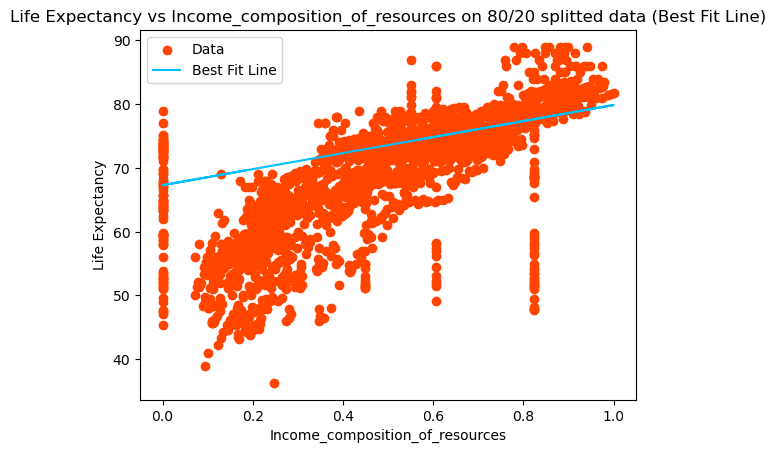

In [142]:
#Plot the best-fit line for training copied data. Income_composition_of_resources vs Life expectancy
income_coef_copy = lr_copy.coef_[1]

X_income_1_copy = scaled_df_X_train_copy['Income_composition_of_resources']
y_pred_lf_1_copy = income_coef_copy * X_income_1_copy + intercept_copy

plt.scatter(X_income_1_copy, Y_train_copy, color='orangered', label='Data')
plt.plot(X_income_1_copy, y_pred_lf_1_copy, color='deepskyblue', label='Best Fit Line')
plt.xlabel('Income_composition_of_resources')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Income_composition_of_resources on 80/20 splitted data (Best Fit Line)')
plt.legend()

In [143]:
#Dataframe for predicted and actual values on copy data
results_diff_copy = pd.DataFrame({'Predicted Value': Y_pred_copy, 'Actual Value': Y_test_copy})
results_diff_copy

,Predicted Value,Actual Value
2402,56.682376,54.0
203,67.681383,67.3
2325,76.167788,79.3
1744,65.567808,73.5
1093,54.608398,57.6
...,...,...
2445,72.800379,74.5
370,77.670208,77.1
1791,61.341972,63.5
975,54.732963,56.6


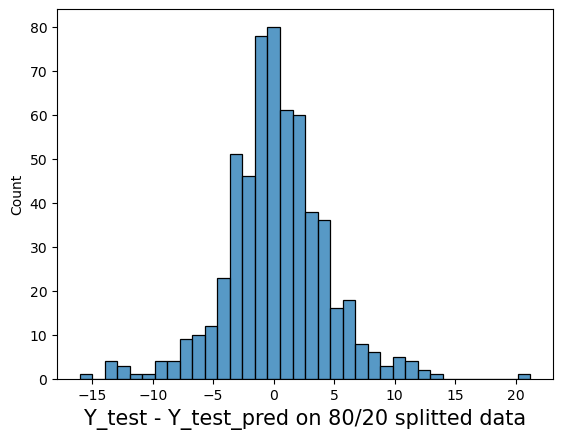

In [144]:
#Plot the histogram for the error/cost function on copy data
fig = plt.figure()
sb.histplot(Y_test_copy - Y_pred_copy)
plt.xlabel('Y_test - Y_test_pred on 80/20 splitted data', fontsize = 15)  
plt.show()

### After increasing the train data by splitting 80/20, the multilinear model improved significantly
    - MAE: On average, the model's predictions deviate from the actual values by about 3.02 years of life expectancy. This indicates that the model provides predictions that are quite close to the actual values, and a lower MAE suggests improved accuracy compared to your previous model.
    - MSE: This value represents the average squared difference between the predicted and actual values. An MSE of 17.31 indicates that the model's predictions are relatively precise.
    - r2 coefficient: This r2 value means that about 80.54% of the variance in life expectancy can be explained by the model using the selected features. 

In [146]:
#Compute the metrics for  multilinear regression with copy data
mae_copy = mean_absolute_error(Y_test_copy, Y_pred_copy)
mse_copy = mean_squared_error(Y_test_copy, Y_pred_copy)
r2_copy = r2_score(Y_test_copy, Y_pred_copy)

print('Mean Absolute Error: ', mae_copy)
print('Mean Squared Error: ', mse_copy)
print('R2 coefficient: ', r2_copy)

Mean Absolute Error:  3.0214847725530407
Mean Squared Error:  17.31048110982294
R2 coefficient:  0.8054237858920115


#### Metric results are sign that the model fits the data well and explains a significant portion of the variability in life expectancy.

### Cross Validation: Lasso Regression
    - Since Multicollinearity was already handle by VIF method, K-fold cross validation will be performed for Lasso (L1)-Regularization 

In [277]:
cross_val_scores_lasso = []

# List to maintain the different values of alpha
alpha = []

# Loop to compute the cross-validation scores
for i in range(1, 21): # Test 20 alpha values
    lm = Lasso(alpha=i*0.01, tol=0.0925) 
    lm.fit(X_train_top_copy, Y_train_copy)

    # This is a validation to test model performance, but doesn't improve it by itself
    score = cross_val_score(lm, X_train_top_copy, Y_train_copy, cv=10) # Split in 10 is the standard
    avg_score = mean(score) * 100
    cross_val_scores_lasso.append(avg_score)
    alpha.append(i*0.01) # same value tan alpha in lasso function 

In [279]:
cross_val_scores_lasso

[79.41700720976426,
 79.40045355756169,
 79.37361452450673,
 79.33579553251563,
 79.28781476032782,
 79.22958985083838,
 79.17194679974054,
 79.10813611341025,
 79.04691771708652,
 78.9785149830572,
 78.89979172335192,
 78.81297432387362,
 78.71886104502353,
 78.61757348689568,
 78.50909521349905,
 78.3934345848968,
 78.27053846631289,
 78.14040685774737,
 78.00303975920022,
 77.85864829671831]

In [281]:
# Best score is given by the scores list (i=0.01 = 1*0.1 = 0.01)
lm_best = Lasso(alpha=0.01, tol=0.0925) #alpha is customizable from 0 to 1
lm_best.fit(X_train_top_copy, Y_train_copy)

Lasso(alpha=0.01, tol=0.0925)

In [283]:
lm_best.coef_

array([ -6.85407622,  13.29307702,   2.48981462, -12.07749034,
         2.25055941])

In [285]:
# Return r2 score for test data after lasso regression 
r2_score_lasso = lm_best.score(X_test_top_copy, Y_test_copy)
r2_score_lasso

0.8047680514782761

#### The drop in R² score after Lasso regression is likely due to unnecessary regularization in an already well-performing model. Lasso might not be suitable in this specific case.

    - The model doesn't show significant signs of overfitting.
    - The dataset and feature set may already be optimized.